## House Prices: Advanced Regression Techniques

#### Dataset to downloaded from the below link
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

## Problem Statement:

__Description__ <br>
Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

__Practice Skills__ <br>
- Creative feature engineering and feature selection
- Building a Local Feature Store for ML Training and Prediction
- Get features from offline store(batch scoring) for train model and online store(low latency) for inferencing model

## Piepline Workflow:
This is an end-to-end binary classification example following the steps:
- Part 1: Fetch data from data source(Shared Volume) and process it labelling and imputing missing values to data
- Part 2: On Notebook side do Data processing and Feature Engineering
- Part 3: Apply feature views and services and store feature into offline and online store
- Part 4: Train model on dataset with various classification methods and get features from offline store and track model components with MLflow
- Part 5: Get real time low latency feature from online feature store for inferencing
- Part 6: Get the best model and Deploy model with KServe (Kubeflow)


Here's the end-to-end information flow

<img src="./house-price-workflow.png" width="80%">


## Copy data to project repository.

In [ ]:
import os, shutil
PATH = "/mnt/user/data/HousingPriceRegression"
os.makedirs(PATH)
shutil.copyfile('/home/hpedemouser01/house-price/dataset/train.csv', f'{PATH}/train.csv')
shutil.copyfile('/home/hpedemouser01/house-price/dataset/test.csv', f'{PATH}/test.csv')

## All the Lifecycle In A Data Science Projects

#### 1.Data Analysis
#### 2.Feature Engineering
#### 3.Feature Selection
#### 4.Model Building
#### 5.Model Deployment

In [2]:
## Data Analysis Phase
## Main aim is to understand more about the data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
## Display all the columns of the dataframe

pd.pandas.set_option('display.max_columns',None)

### Exploratory Data Analysis Part

#### Reading the train csv for analysis

In [3]:
dataset=pd.read_csv(f'{PATH}/train.csv')

## print shape of dataset with rows and columns
print(dataset.shape)

(1259, 81)


In [4]:
## print the top5 records
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### In Data Analysis We will Analyze To Find out the below stuff
1. Missing Values
2. All The Numerical Variables
3. Distribution of the Numerical Variables
4. Categorical Variables
5. Cardinality of Categorical Variables
6. Outliers
7. Relationship between independent and dependent feature(SalePrice)


## Missing Values

#### We try to find how many missing values are present with respect to each and every feature. By using list comprehension, we will find all the features with missing values. Then we will find out missing values percentage in each feature

In [5]:
## Here we will check the percentage of nan values present in each feature
## 1 -step make the list of features which has missing values
features_with_na=[features for features in dataset.columns if dataset[features].isnull().sum()>1]
## 2- step print the feature name and the percentage of missing values

for feature in features_with_na:
    print(feature, np.round(dataset[feature].isnull().mean(), 4),  ' % missing values')

LotFrontage 0.1732  % missing values
Alley 0.9396  % missing values
MasVnrType 0.0056  % missing values
MasVnrArea 0.0056  % missing values
BsmtQual 0.0278  % missing values
BsmtCond 0.0278  % missing values
BsmtExposure 0.0286  % missing values
BsmtFinType1 0.0278  % missing values
BsmtFinType2 0.0286  % missing values
FireplaceQu 0.4758  % missing values
GarageType 0.0564  % missing values
GarageYrBlt 0.0564  % missing values
GarageFinish 0.0564  % missing values
GarageQual 0.0564  % missing values
GarageCond 0.0564  % missing values
PoolQC 0.9968  % missing values
Fence 0.8094  % missing values
MiscFeature 0.9595  % missing values


### Since they are many missing values, we need to find the relationship between missing values and Sales Price

Let's plot some diagram for this relationship


#### We are plotting the countplot to show the counts of observations in each categorical bin using bars for every features with respect to SalePrice. The feature record having nan values are converted to 1 and feature record which have no nan values are converted as 0.

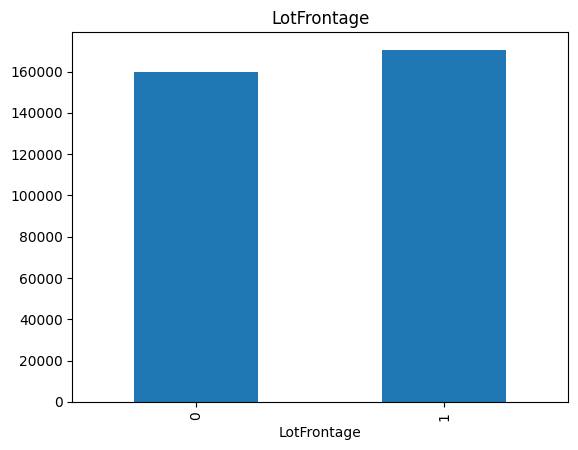

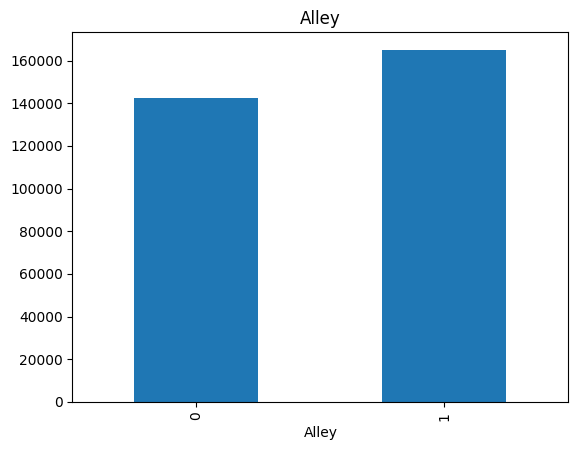

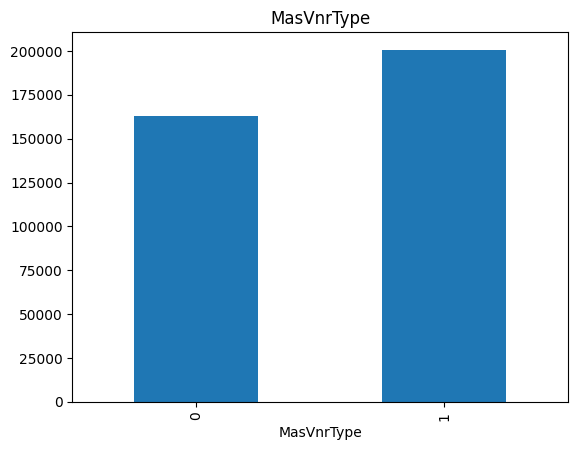

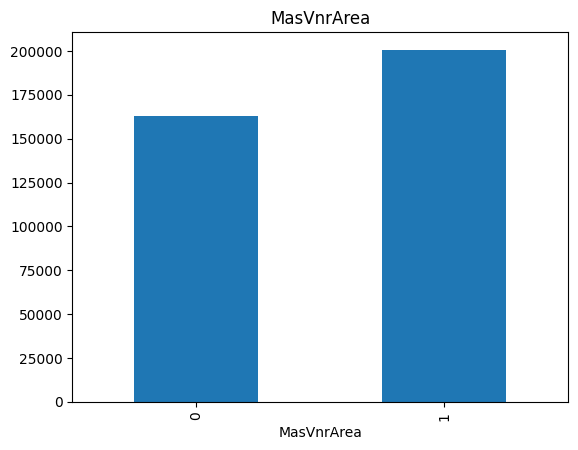

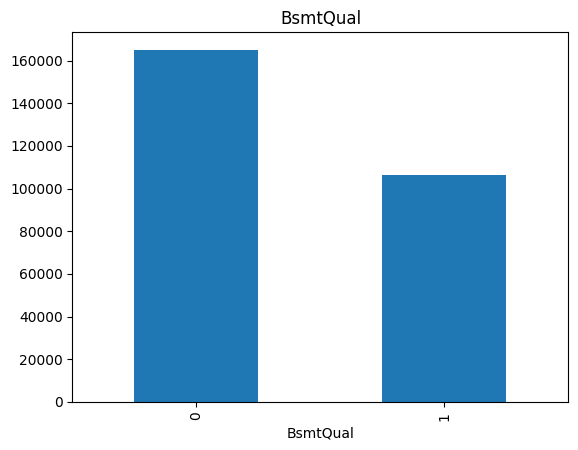

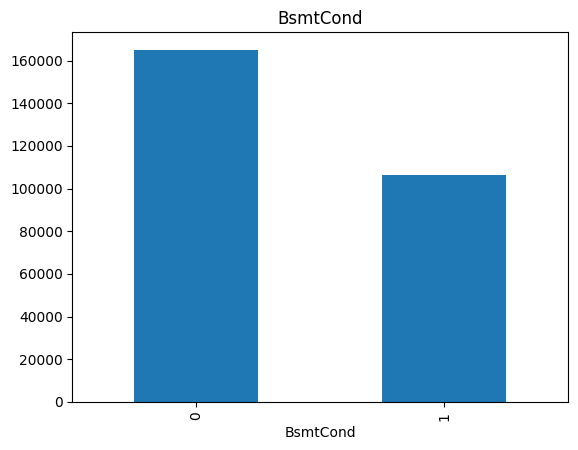

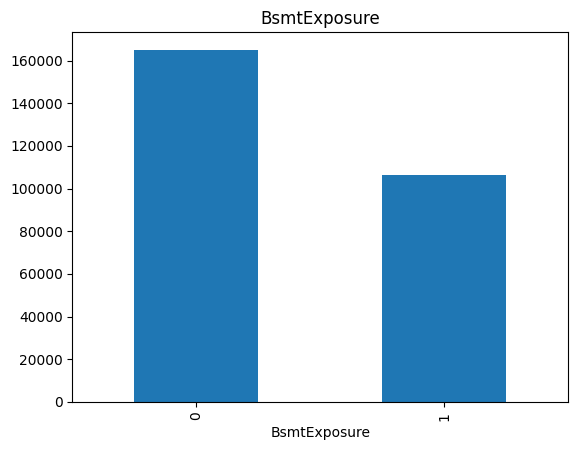

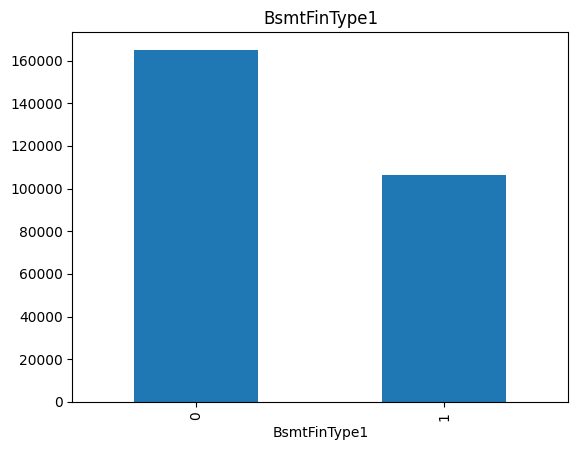

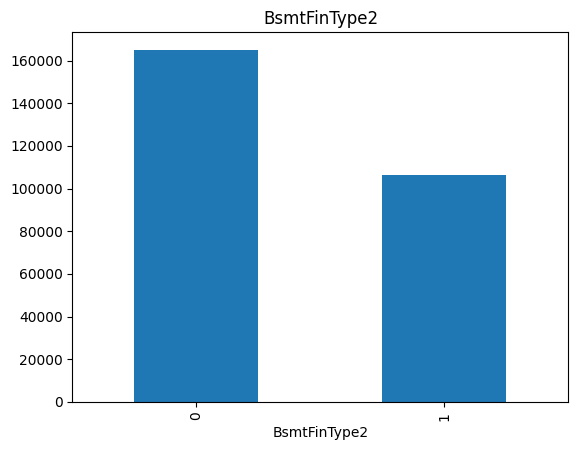

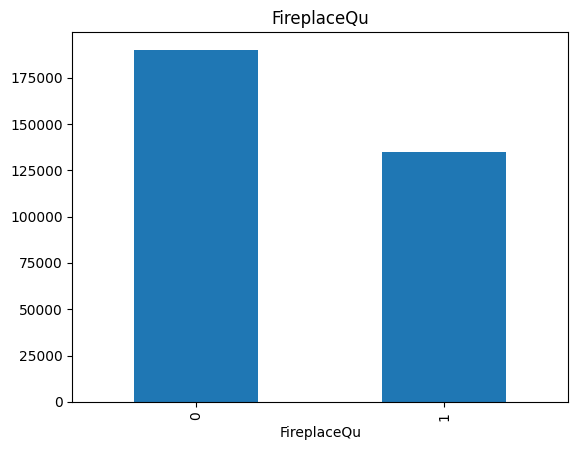

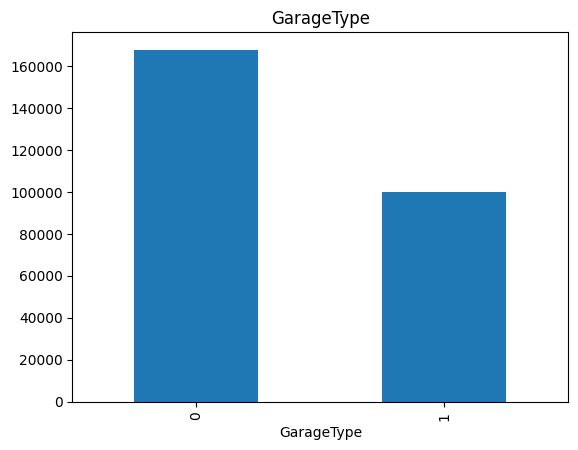

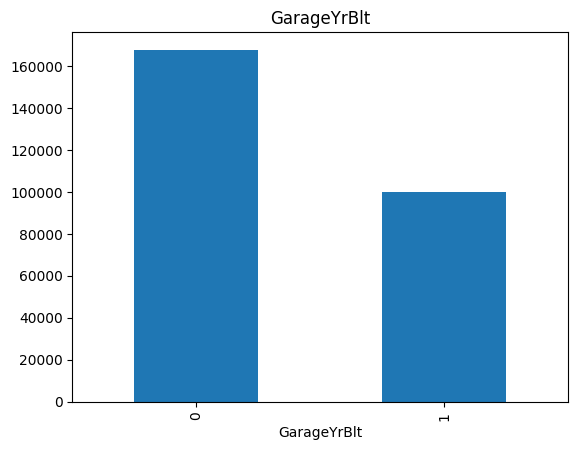

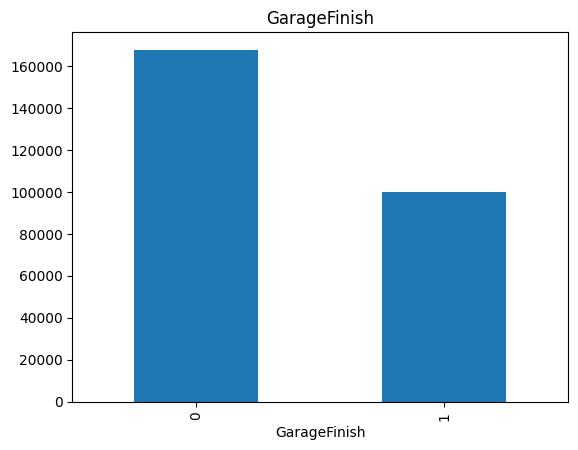

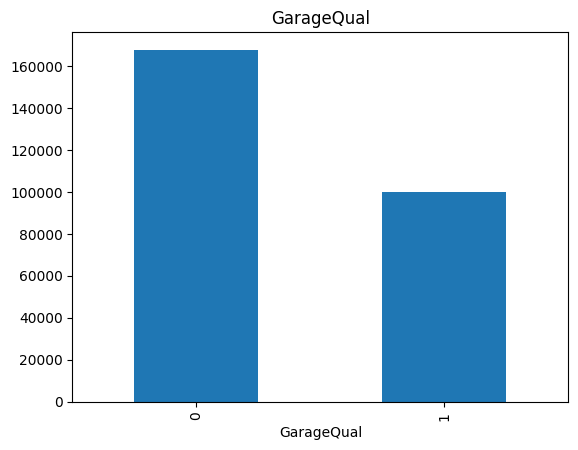

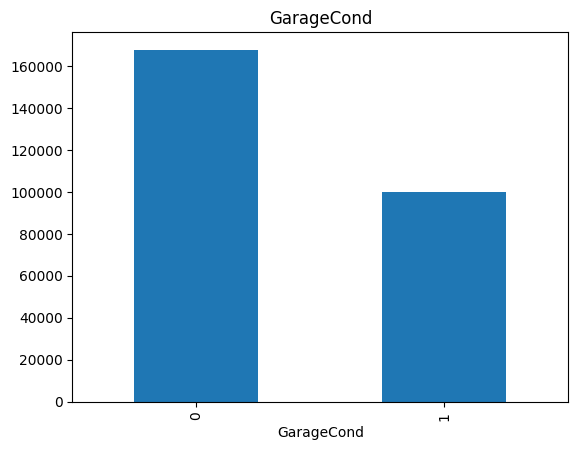

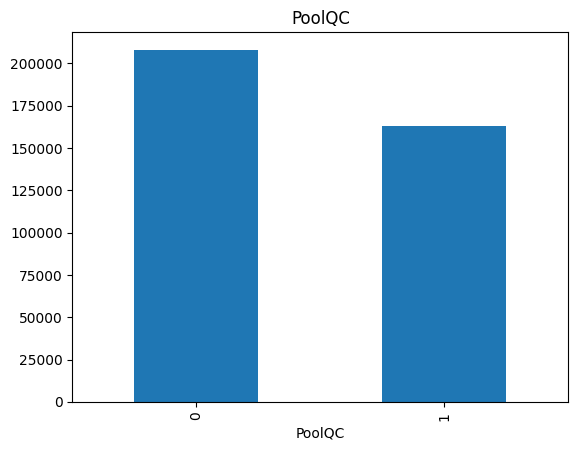

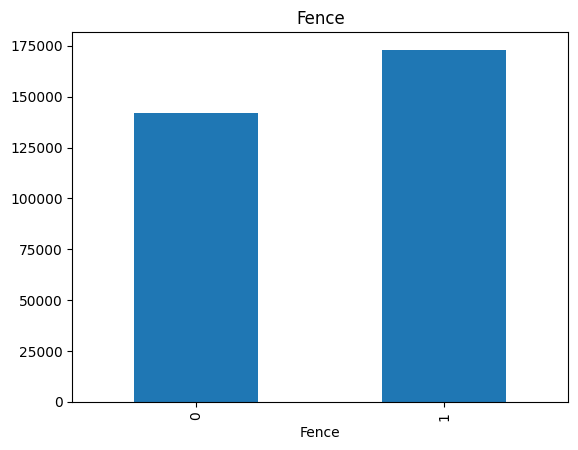

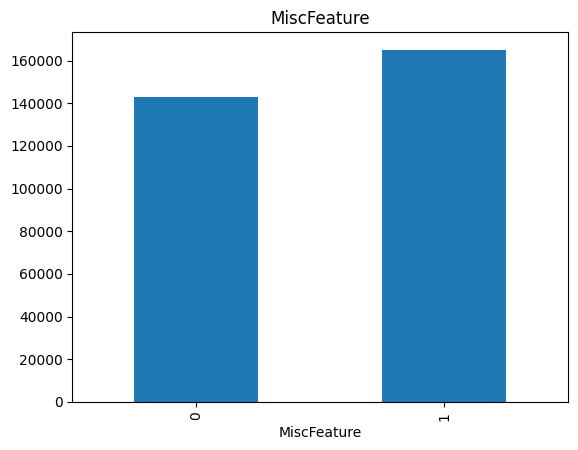

In [6]:
for feature in features_with_na:
    data = dataset.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    
    # let's calculate the mean SalePrice where the information is missing or present
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

Here we can see that, when the nan values has higher number the salesprice median is also high

Here With  the relation between the missing values and the dependent variable is clearly visible.So We need to replace these nan values with something meaningful which we will do in the Feature Engineering section

From the above dataset some of the features like Id is not required

In [7]:
print("Id of Houses {}".format(len(dataset.Id)))

Id of Houses 1259


### Numerical Variables

By using list comprehension we will find out the features who have numerical variable. then show the length of numerical variable

In [8]:
# list of numerical variables
numerical_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))

# visualise the numerical variables
dataset[numerical_features].head()

Number of numerical variables:  38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


There are some numerical features which are temporal variable, Temporal variable are associated with time intervals and points in time, and measures of phenomena that vary over time or index temporal environments.

#### Temporal Variables(Eg: Datetime Variables)

From the Dataset we have 4 year variables. We have extract information from the datetime variables like no of years or no of days. One example in this specific scenario can be difference in years between the year the house was built and the year the house was sold.

In [9]:
# list of variables that contain year information
year_feature = [feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [10]:
# let's explore the content of these year variables
for feature in year_feature:
    print(feature, dataset[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006. 1960. 199

#### Now we are going to analyze Temporal Datetime Variables by grouping YrSold with respect to median of SalePrice

Text(0.5, 1.0, 'House Price vs YearSold')

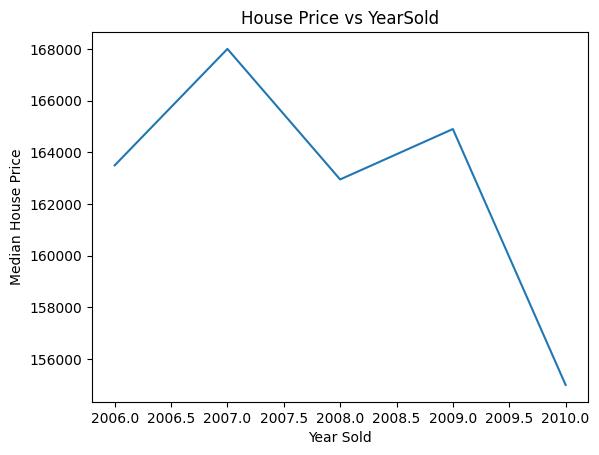

In [11]:
## Lets analyze the Temporal Datetime Variables
## We will check whether there is a relation between year the house is sold and the sales price

dataset.groupby('YrSold')['SalePrice'].median().plot()
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')
plt.title("House Price vs YearSold")



As we can conclude with the plot that Price is decreasing over year, as the price will increase usually over increasing the year.

In [12]:
year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

#### Now we will plot the difference between year variable and year the house was sold, that will provide more information regarding all the years parameter

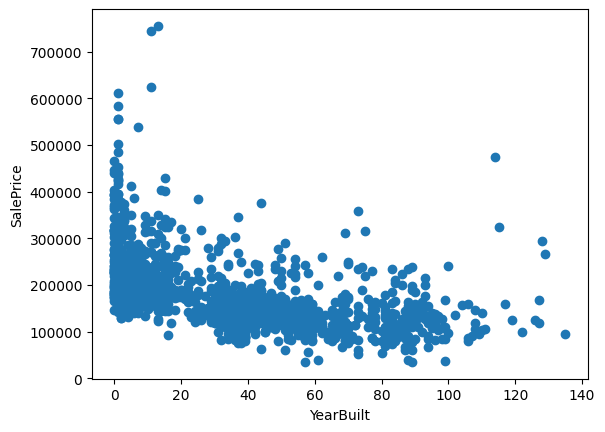

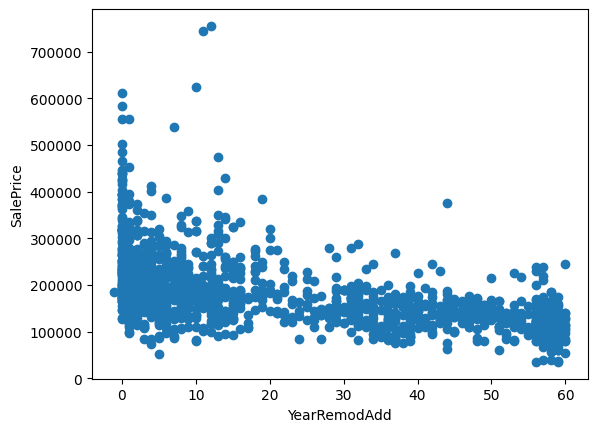

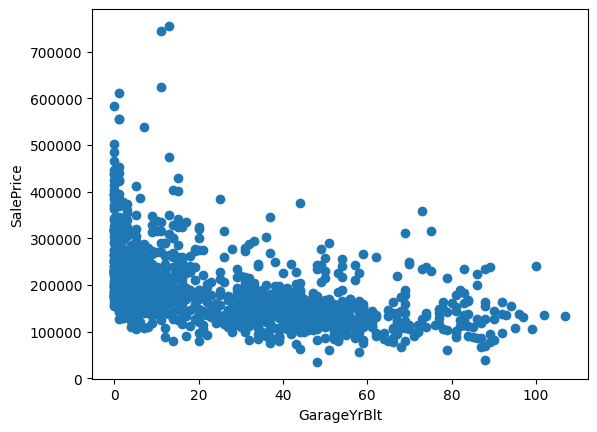

In [13]:
## Here we will compare the difference between All years feature with SalePrice

for feature in year_feature:
    if feature!='YrSold':
        data=dataset.copy()
        ## We will capture the difference between year variable and year the house was sold for
        data[feature]=data['YrSold']-data[feature]

        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

    
    

### Numerical variables are usually of 2 types:
#### Continous variable 
#### Discrete Variable

#### Discrete variable

we can find discrete feature from numerical features, if the feature unique is less then 25 and feature is not the the part of year_feature then it will be considered as discrete features.

In [14]:
## discrete feature

discrete_feature=[feature for feature in numerical_features if len(dataset[feature].unique())<25 and feature not in year_feature+['Id']]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 17


In [15]:
discrete_feature

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [16]:
dataset[discrete_feature].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


### Plot the graph to find the relation between Discrete feature and the median of SalePrice

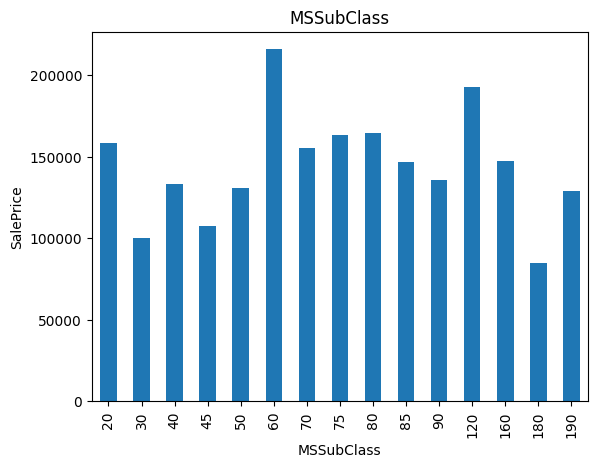

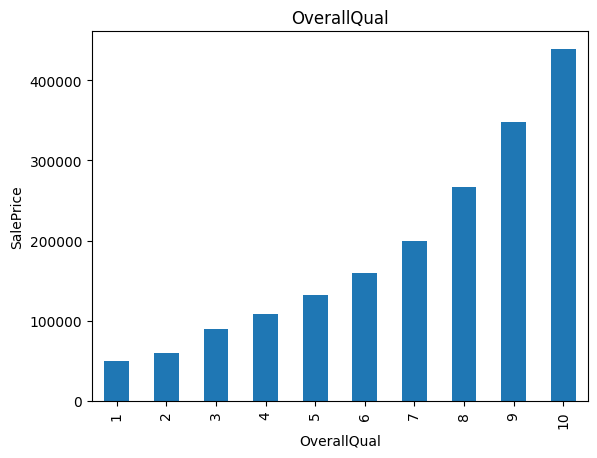

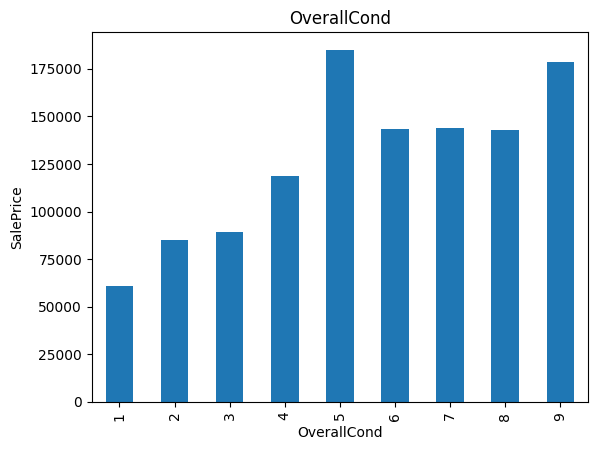

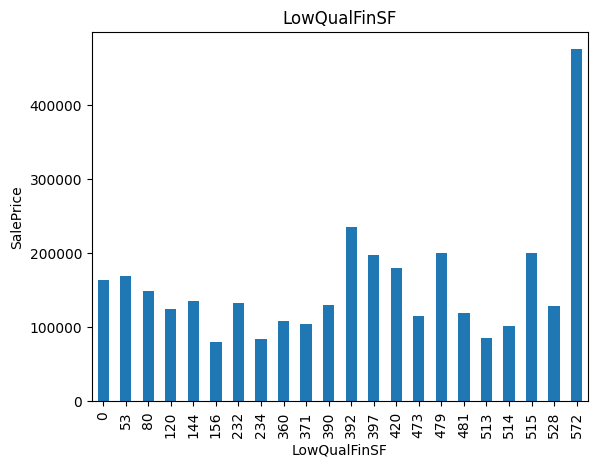

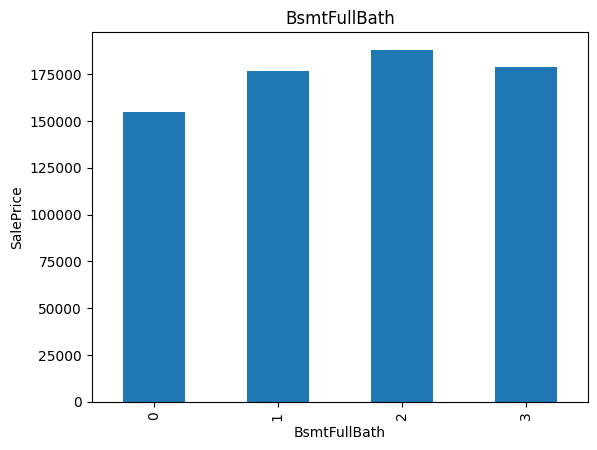

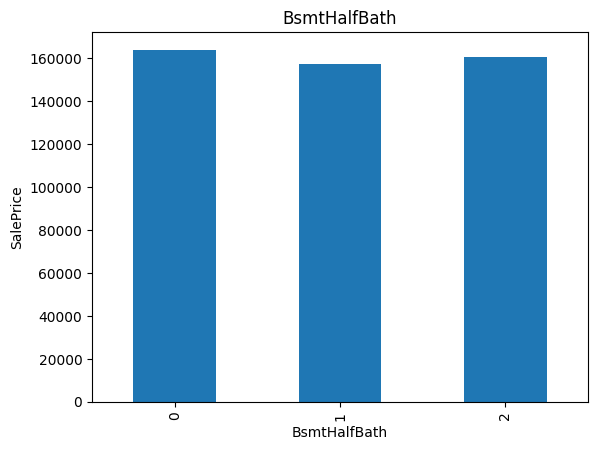

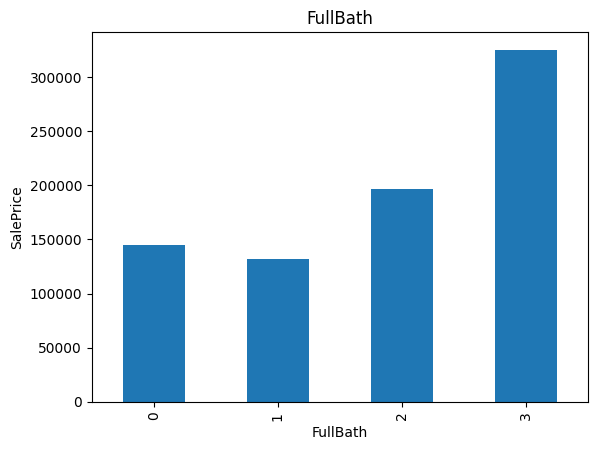

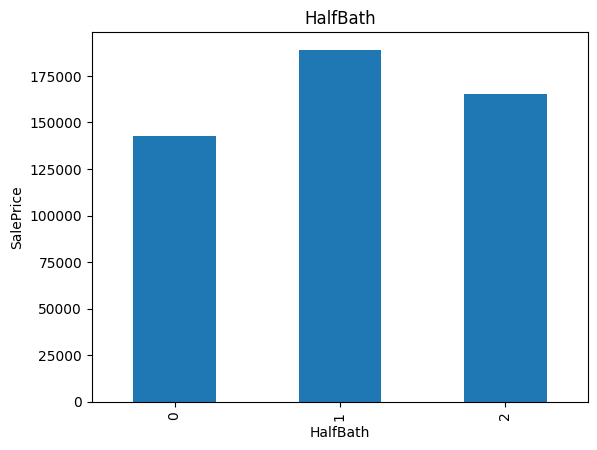

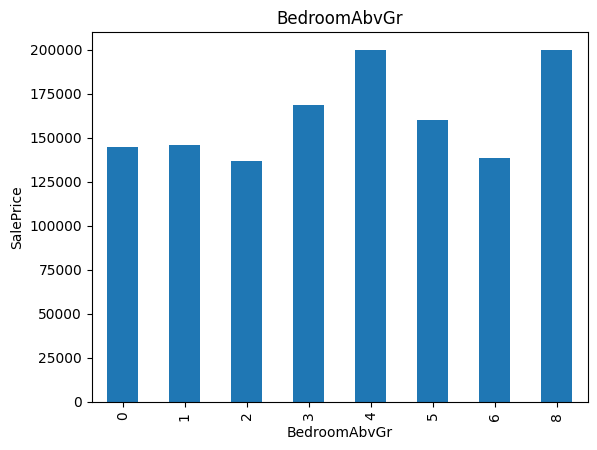

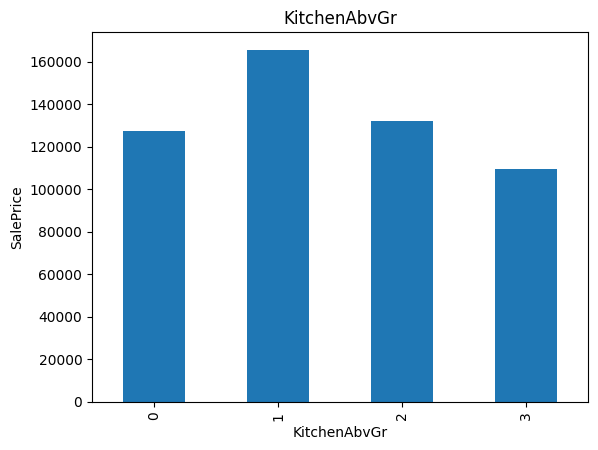

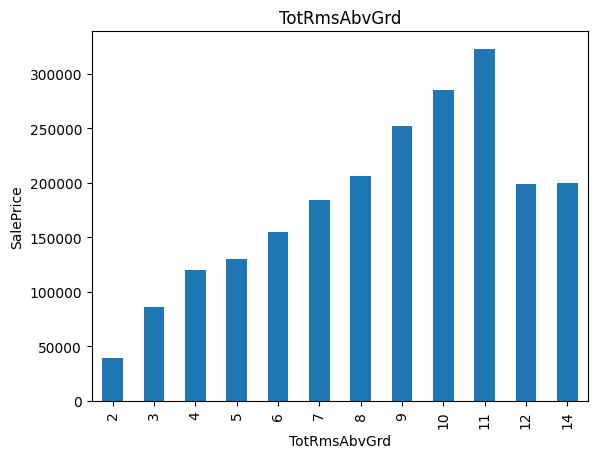

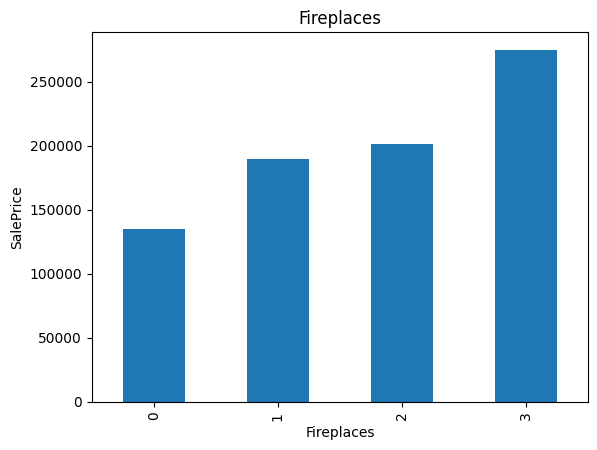

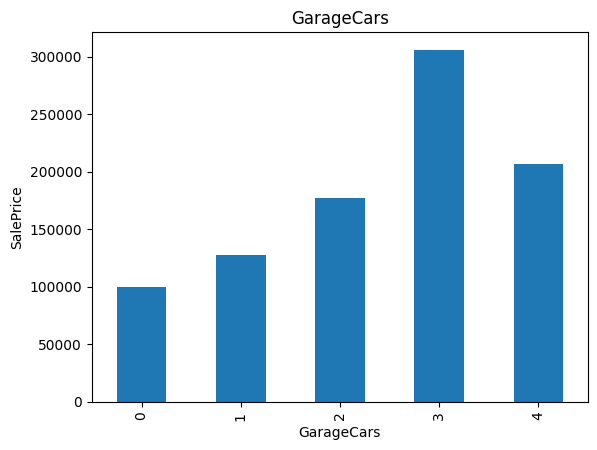

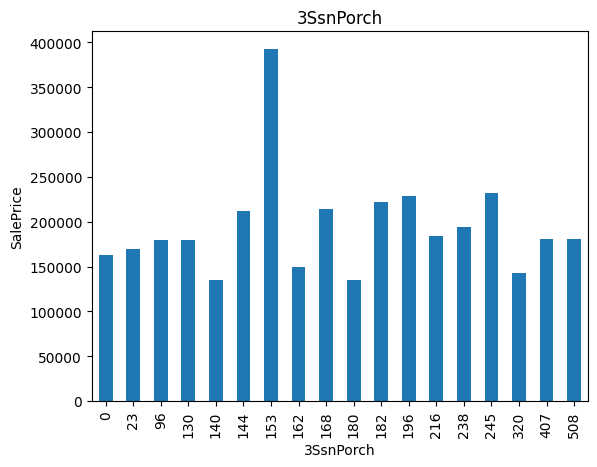

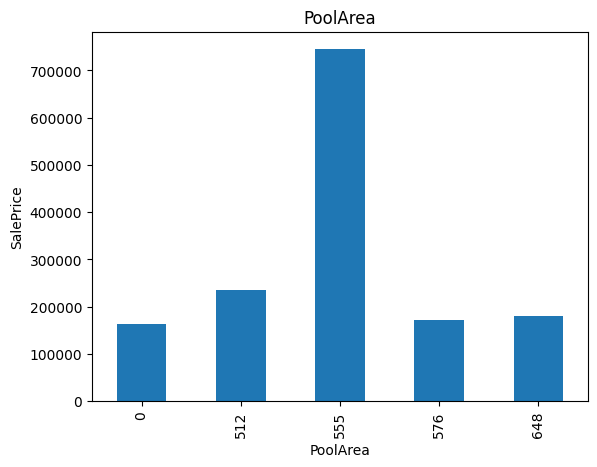

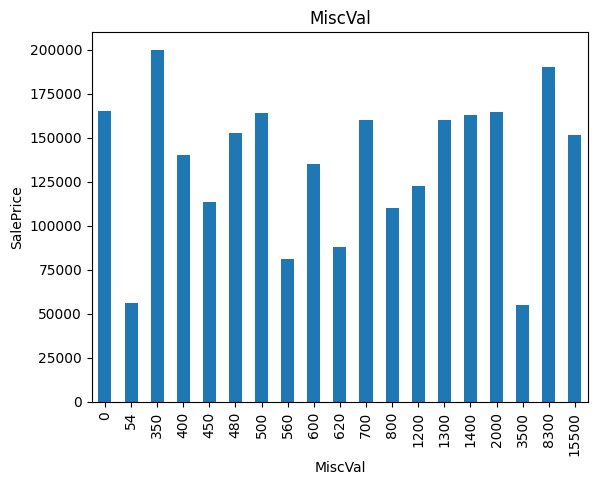

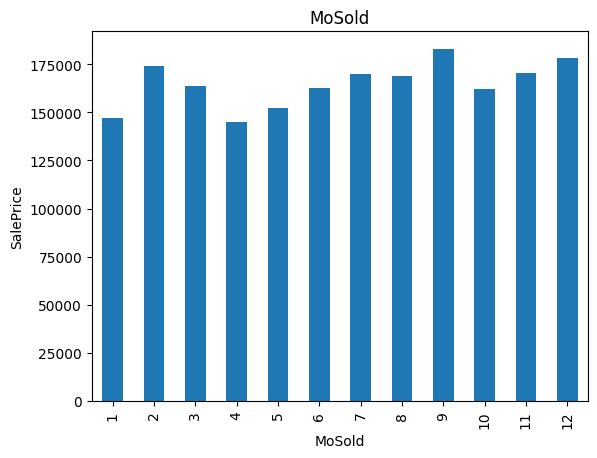

In [17]:
## Lets Find the realtionship between them and Sale PRice

for feature in discrete_feature:
    data=dataset.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

#### In above analysis some of the graph shows Monotonic Relationship 

#### Continuous Variable

we can find Continuous feature from numerical features, if the feature is not in the discrete and feature is not the part of year_feature then it will be considered as continuous features.

In [18]:
continuous_feature=[feature for feature in numerical_features if feature not in discrete_feature+year_feature+['Id']]
print("Continuous feature Count {}".format(len(continuous_feature)))

Continuous feature Count 16


### We need to find out the distribution of Continuous variable, for that we build the histogram.

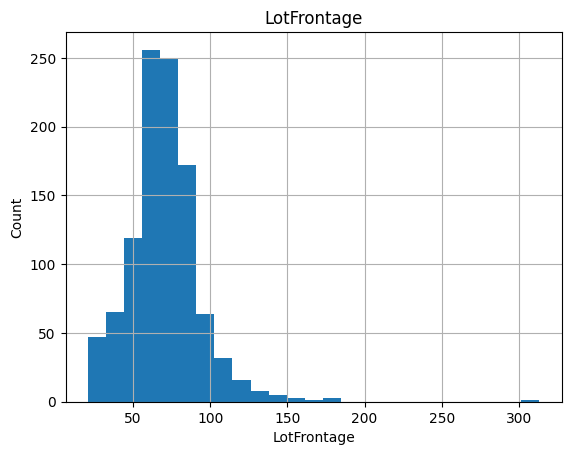

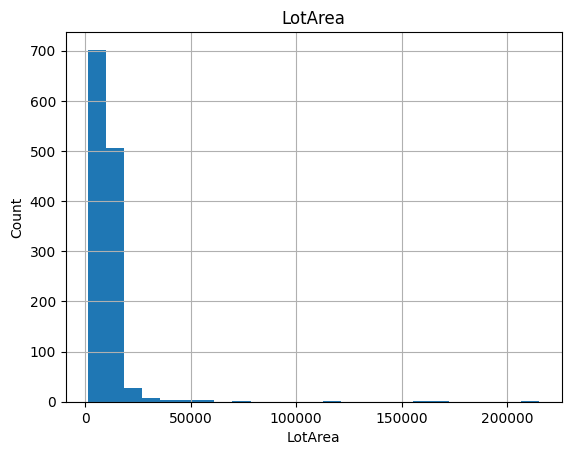

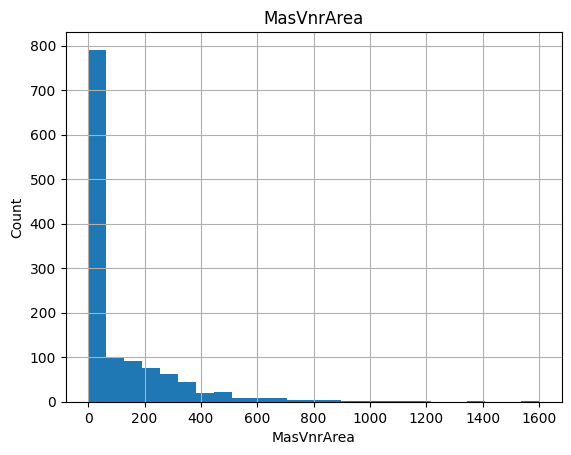

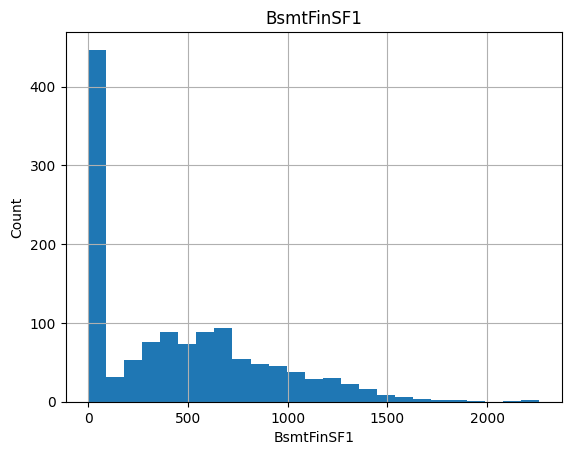

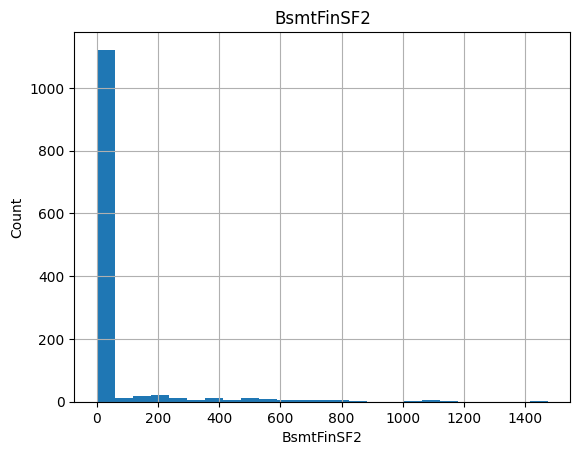

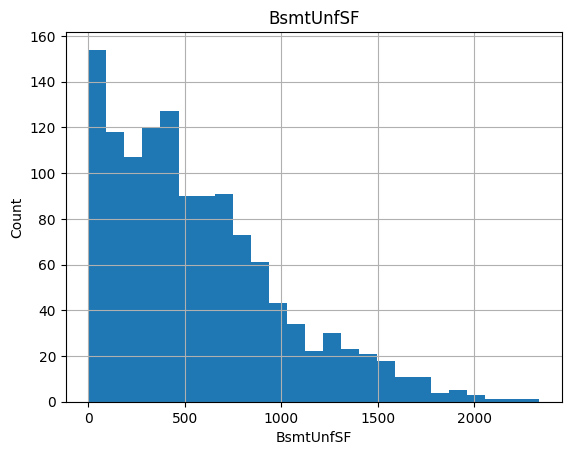

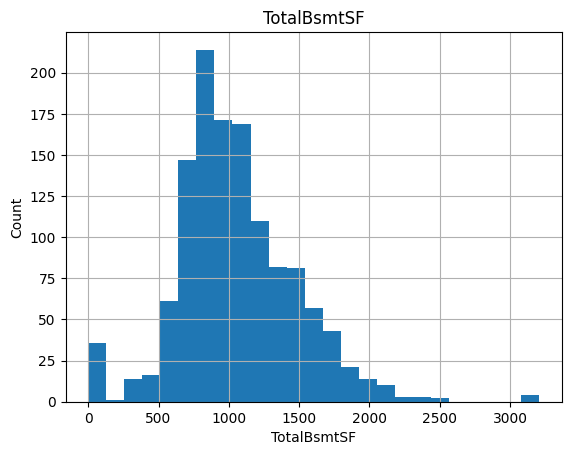

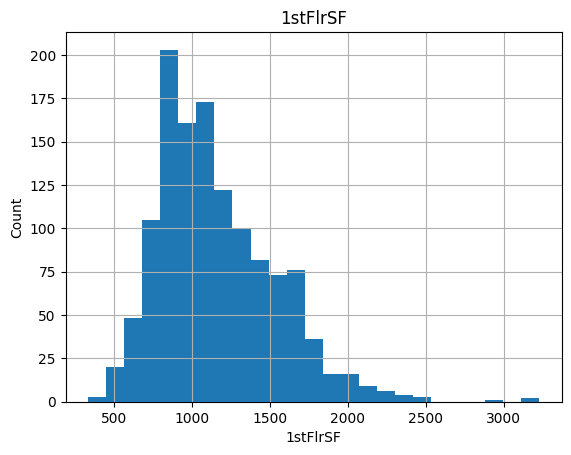

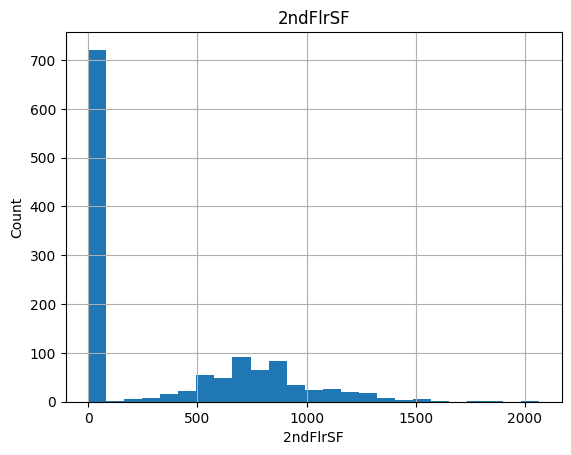

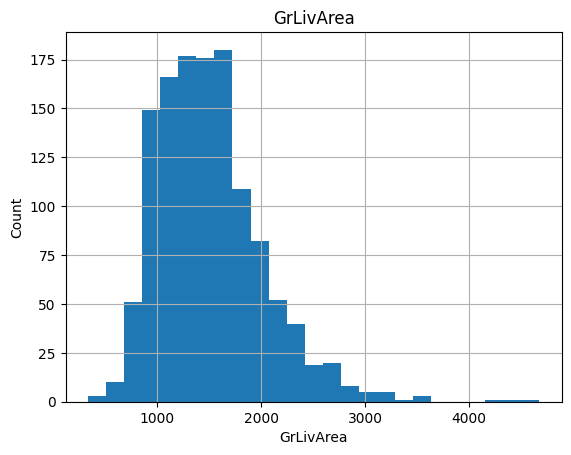

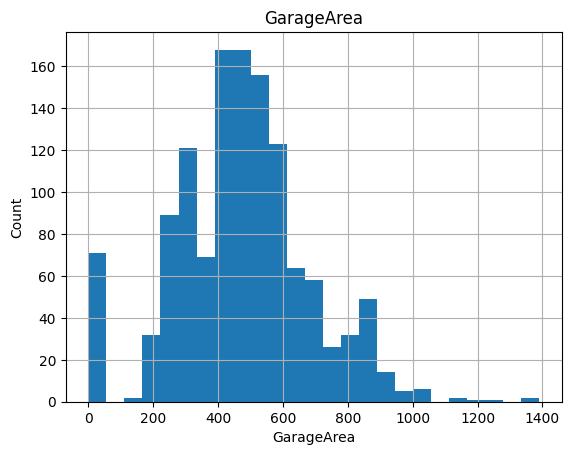

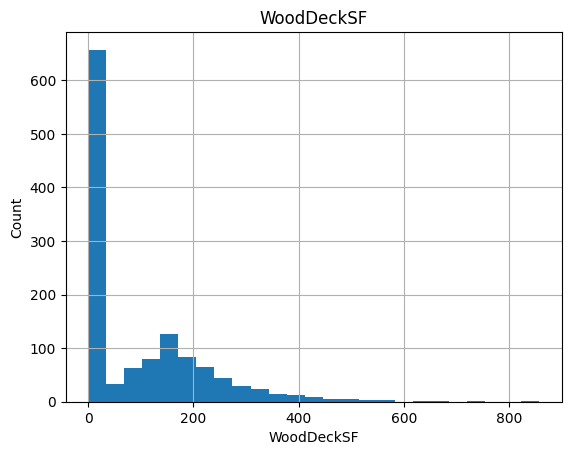

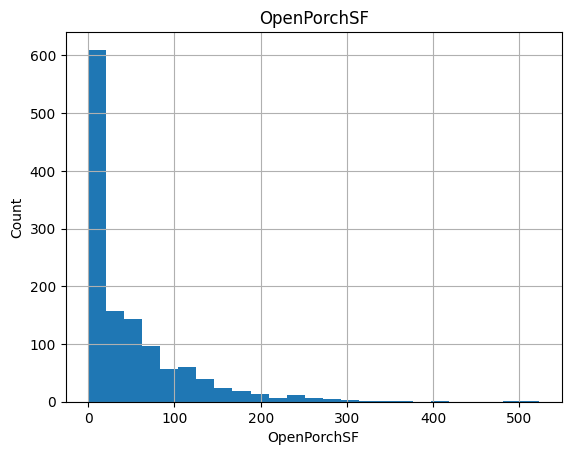

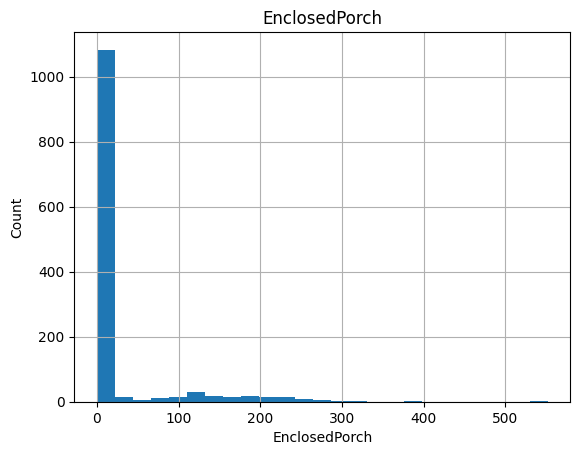

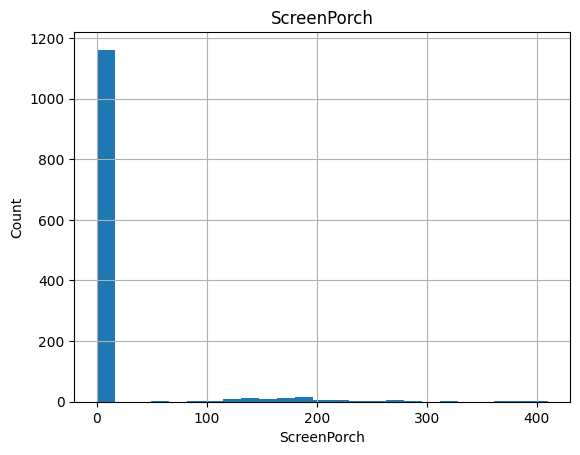

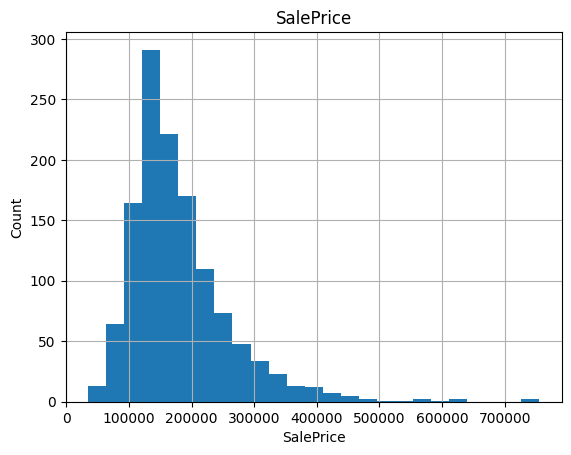

In [19]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    data=dataset.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()


By above analysis we find that some of the features have gaussian distribution but other features does not have gausssian distribution, So it proved that it has Skewed data.In next Exploratory Data Analysis we will work on reducing the Skewness of Data.

### Exploratory Data Analysis Part 2

#### Logarithmic Transformation
Logarithmic Transformation is used to reduce the Skewness of Data. Also it can help convert Non-Linear model to Linear, as per requirement.We just have to apply the natural log transformation function of NumPy (numpy.log or np.log) to the values you want to log transform.

#### Plot the Graph between log transform of Continuous feature and SalesPrice.

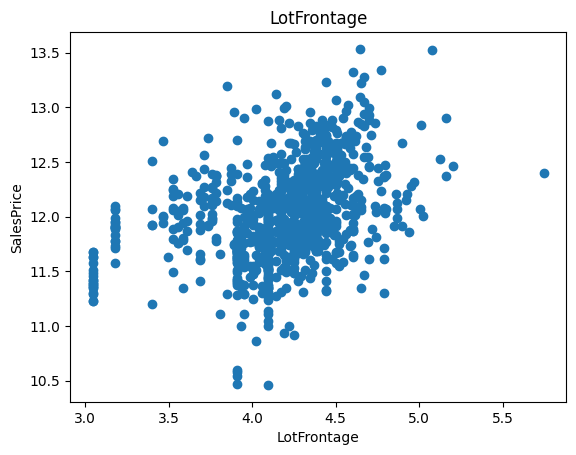

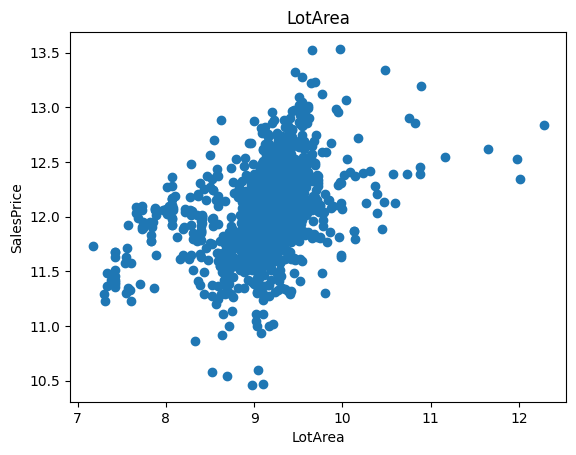

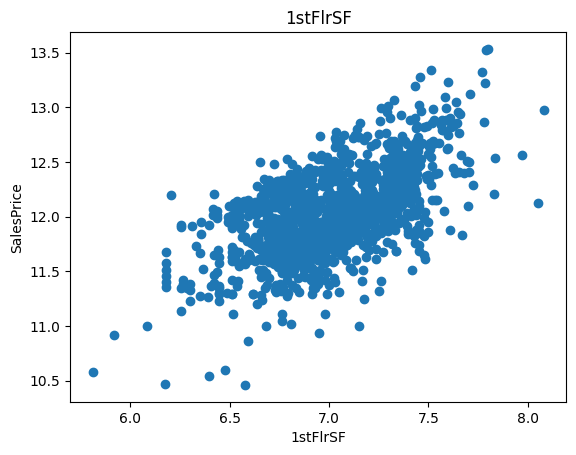

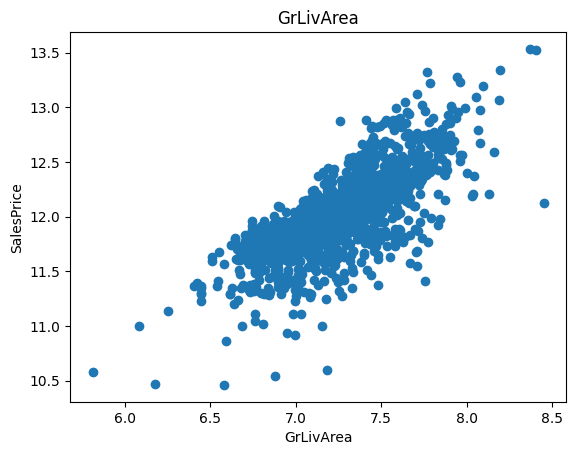

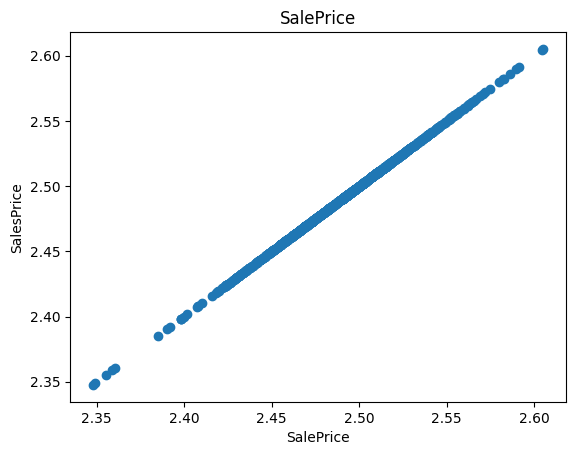

In [20]:
## We will be using logarithmic transformation


for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data['SalePrice']=np.log(data['SalePrice'])
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalesPrice')
        plt.title(feature)
        plt.show()
        
    

From above graph we can see it shows the Monotonic Relationship, as the Continuous feature increases the SalesPrice also increases

## Outliers
Outliers are those data points that are significantly different from the rest of the dataset. They are often abnormal observations that skew the data distribution, and arise due to inconsistent data entry, or erroneous observations.

#### You can use the box plot to explore the continuous feature and visualize the presence of outliers.The points that lie beyond the whiskers are detected as outliers

Plot the box for log transform of each continuous feature and visualize the outliers.

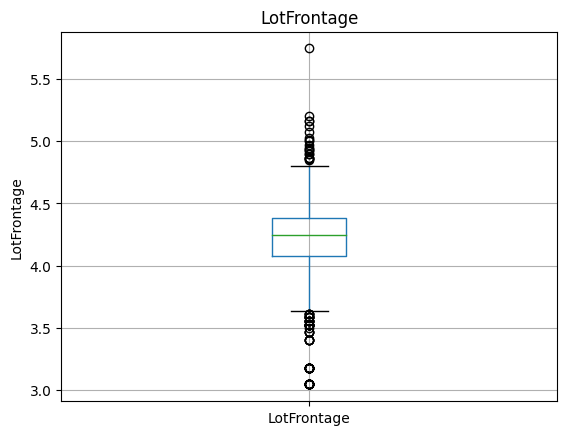

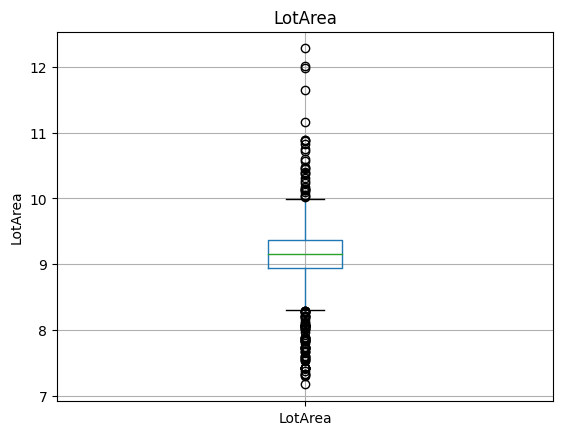

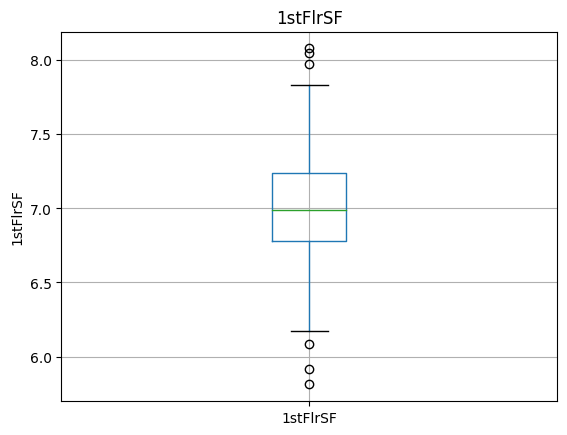

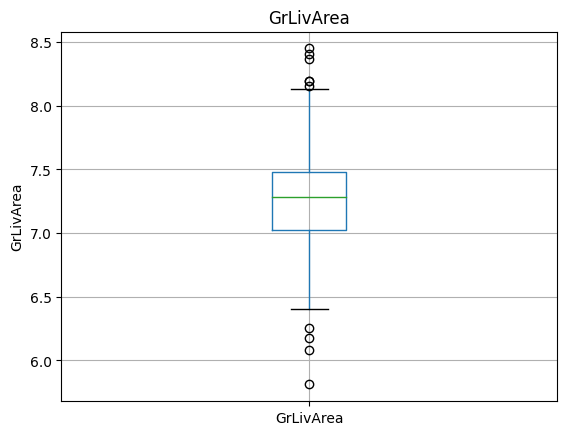

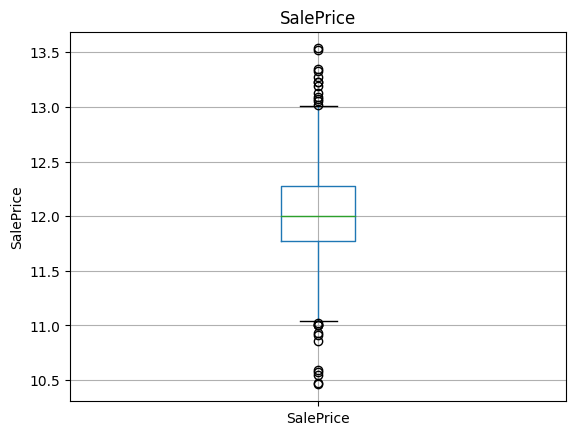

In [21]:
# visualize the continuous feature using box plot
for feature in continuous_feature:
    data=dataset.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()
        
    

### Categorical Variables

We have to find Categorical Variables from the Dataset, If the feature is of type string then it will be considered as Categorical Variable.

In [22]:
# list of categorical variables
categorical_features=[feature for feature in dataset.columns if data[feature].dtypes=='O']
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [23]:
#visualize the categorical feature
dataset[categorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


Now we have to find cardinality.Cardinality are the number of possible values that a feature can assume.

We can find cardinality by finding the length of unique feature that are present in the dataset.

In [24]:
#cardinality in categorical variable
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(dataset[feature].unique())))

The feature is MSZoning and number of categories are 5
The feature is Street and number of categories are 2
The feature is Alley and number of categories are 3
The feature is LotShape and number of categories are 4
The feature is LandContour and number of categories are 4
The feature is Utilities and number of categories are 2
The feature is LotConfig and number of categories are 5
The feature is LandSlope and number of categories are 3
The feature is Neighborhood and number of categories are 25
The feature is Condition1 and number of categories are 9
The feature is Condition2 and number of categories are 8
The feature is BldgType and number of categories are 5
The feature is HouseStyle and number of categories are 8
The feature is RoofStyle and number of categories are 6
The feature is RoofMatl and number of categories are 6
The feature is Exterior1st and number of categories are 14
The feature is Exterior2nd and number of categories are 15
The feature is MasVnrType and number of cate

### Plot the graph to find the relation between Categorical Variable and the median of SalePrice

In [25]:
## By grouping the categorical feature with respect to the median of Salesprice for plotting the graph

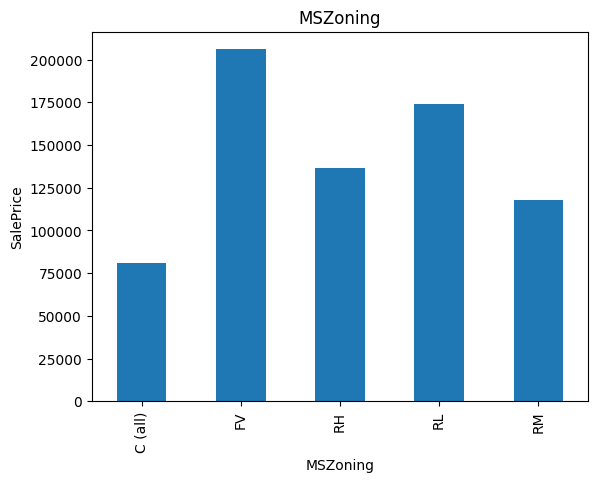

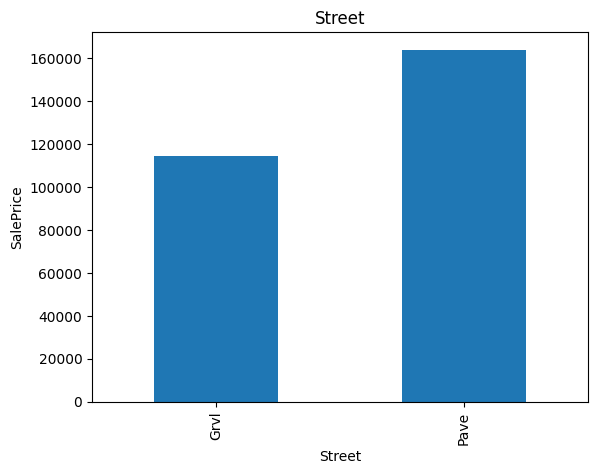

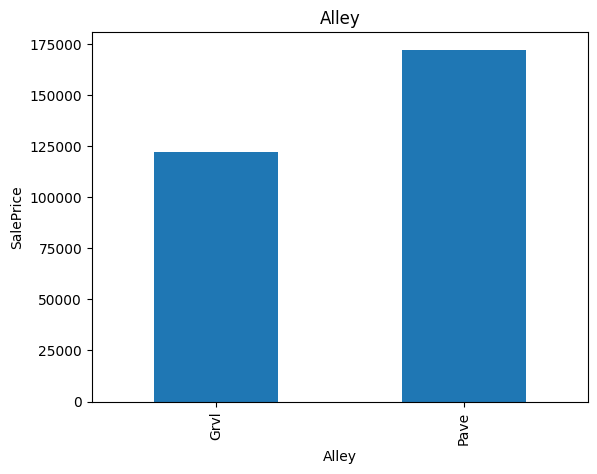

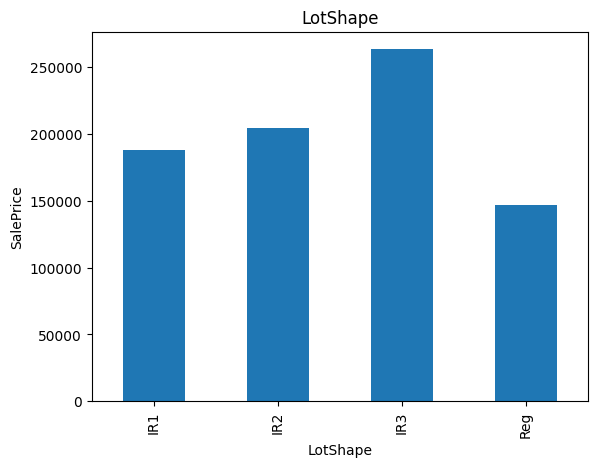

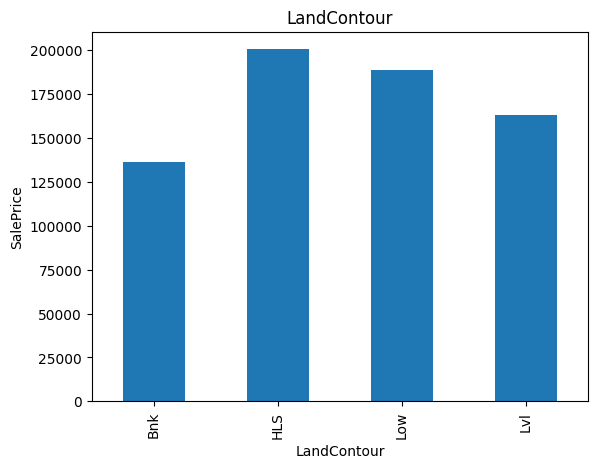

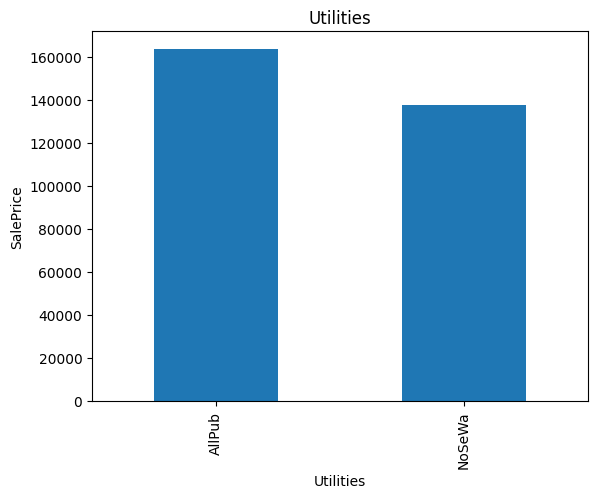

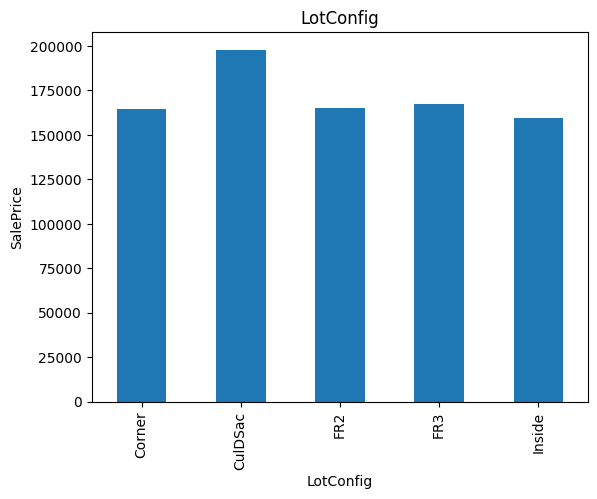

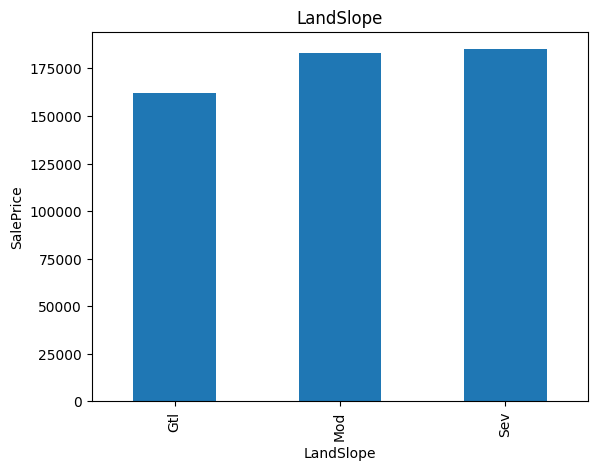

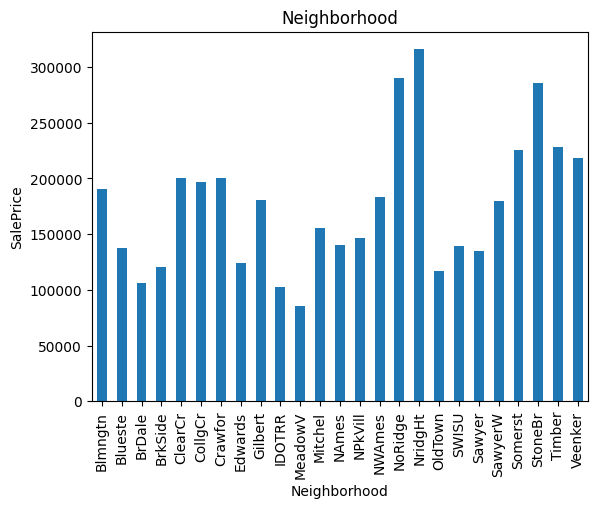

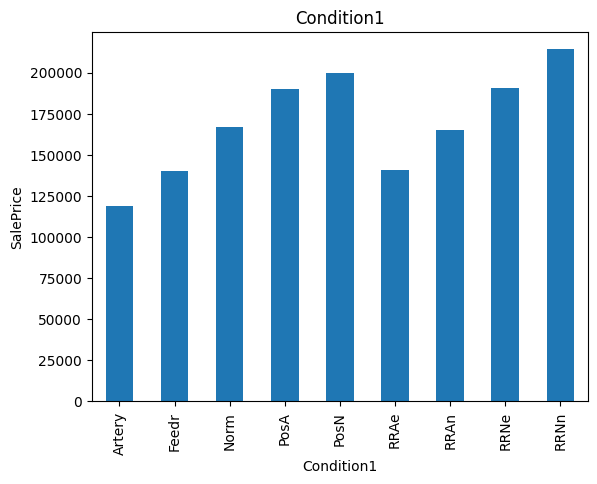

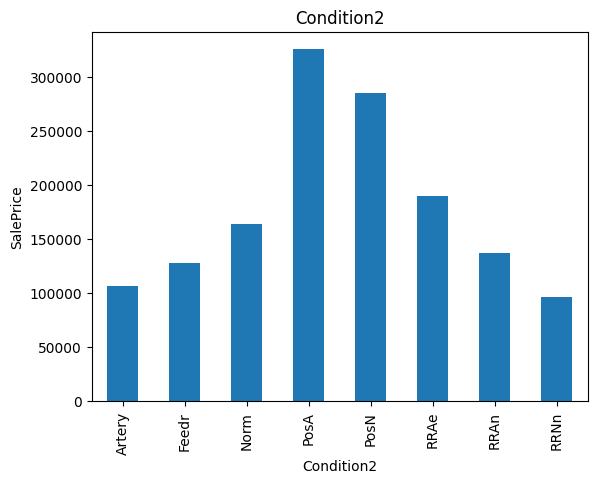

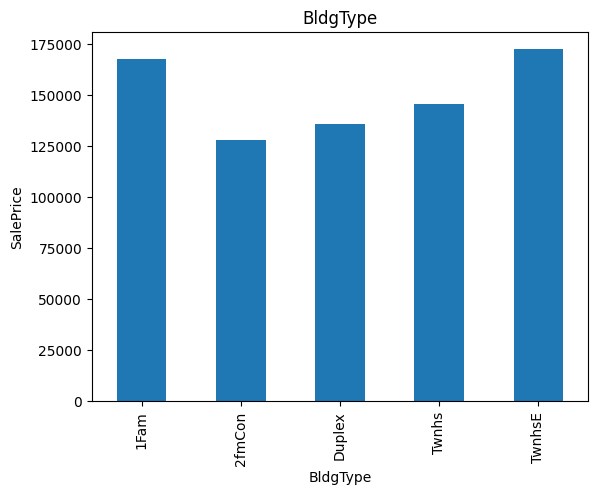

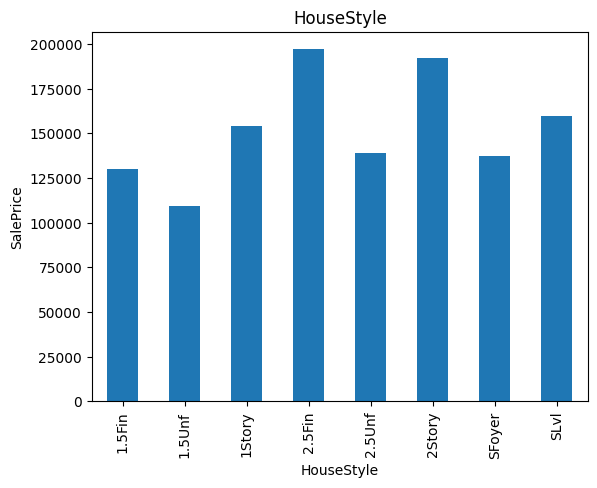

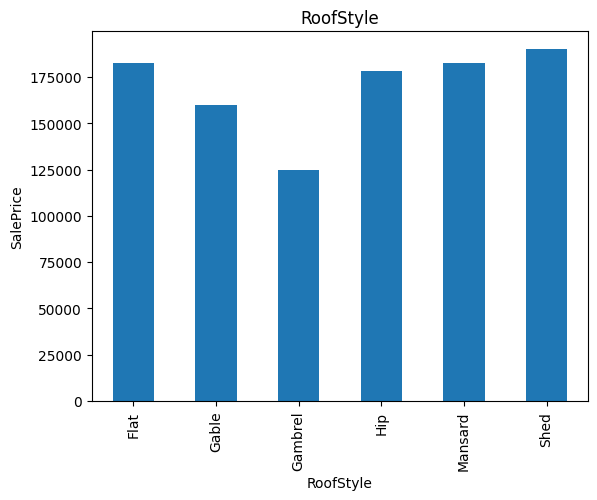

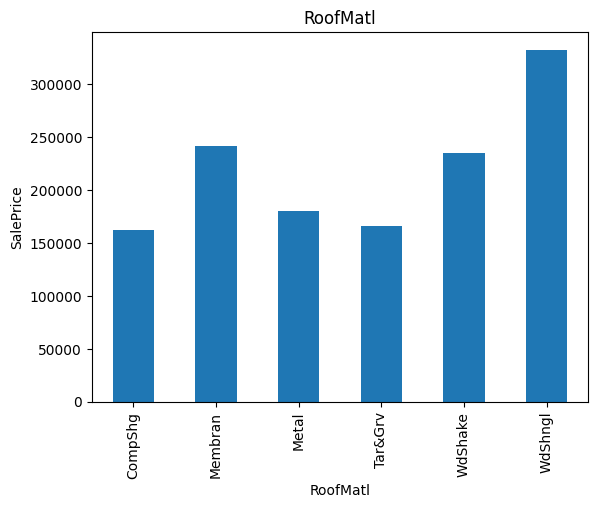

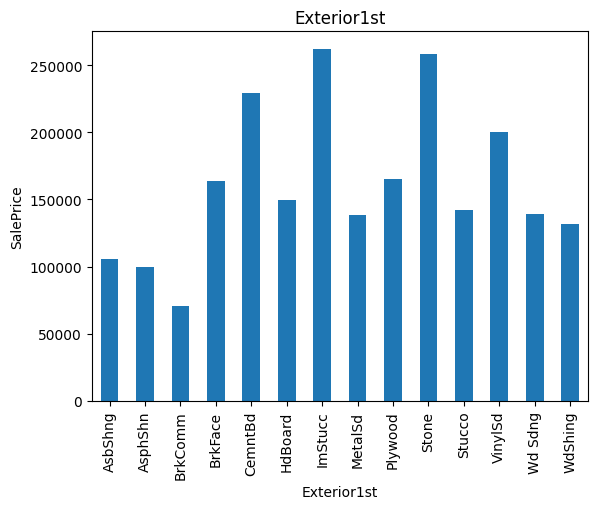

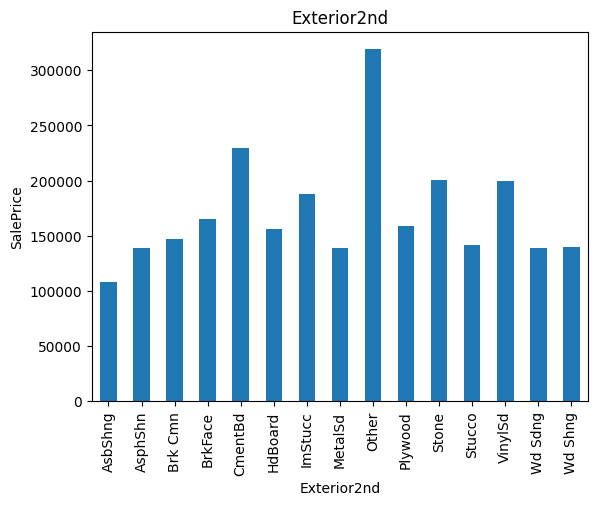

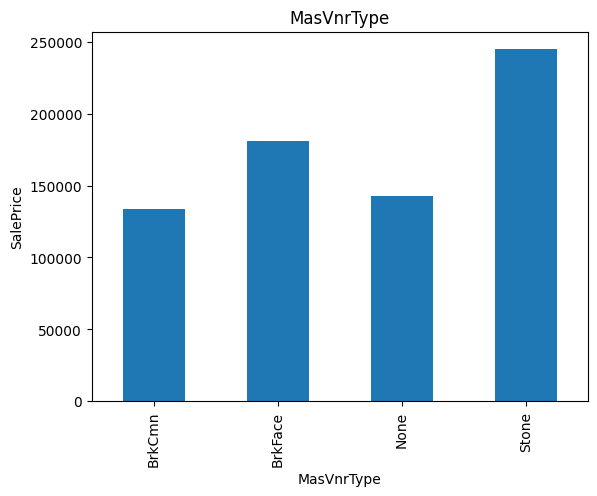

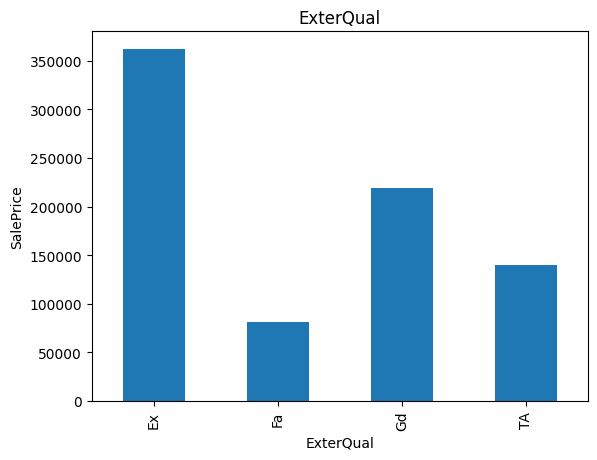

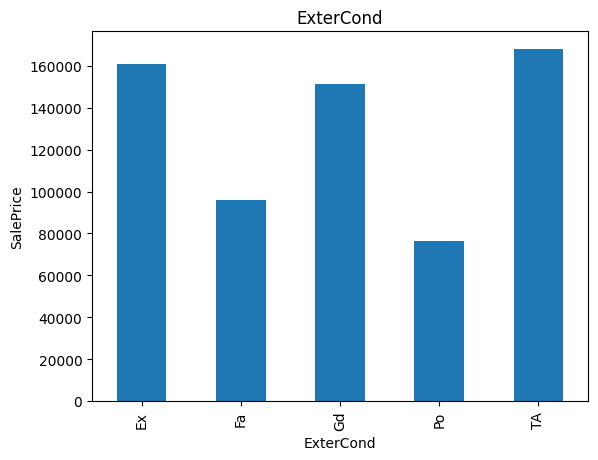

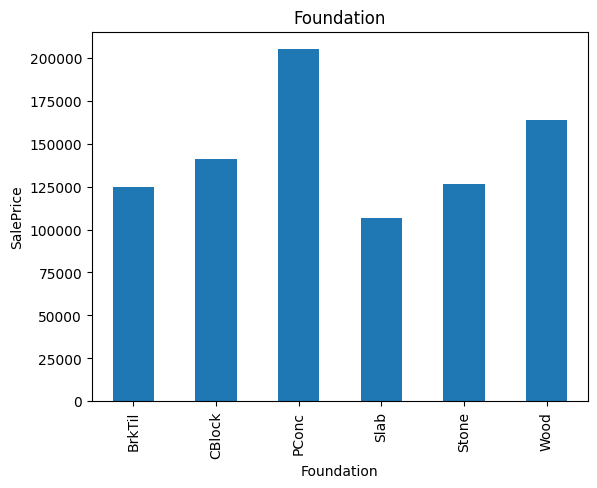

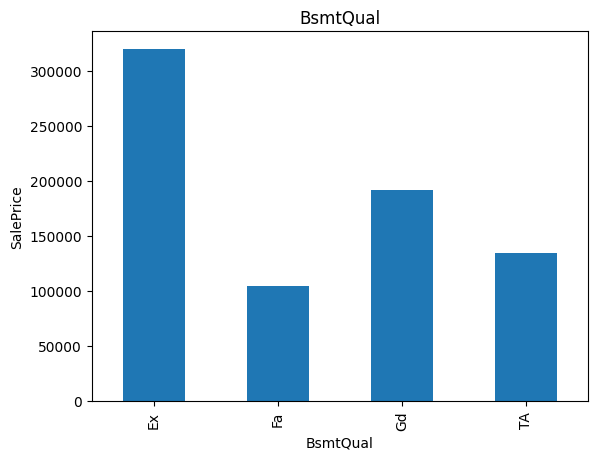

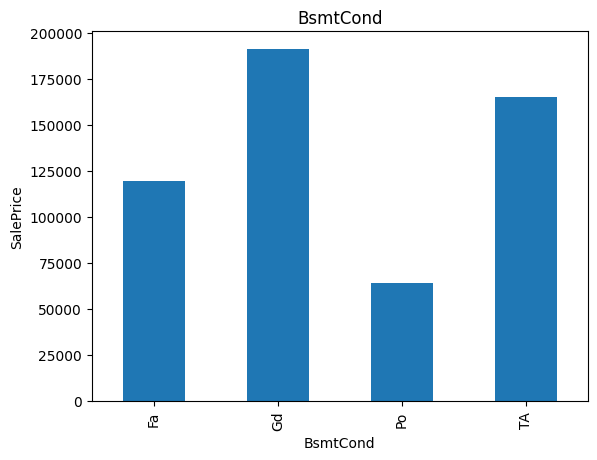

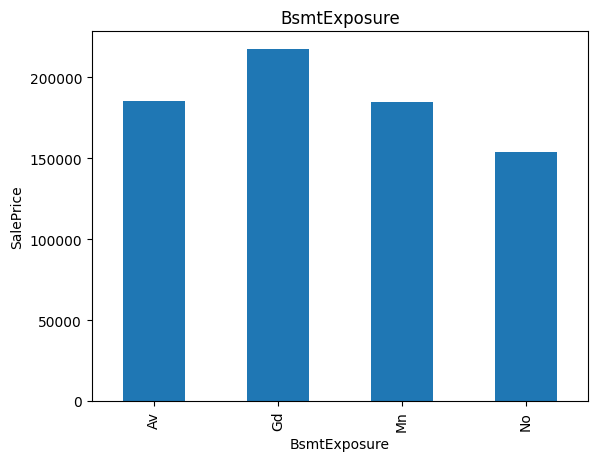

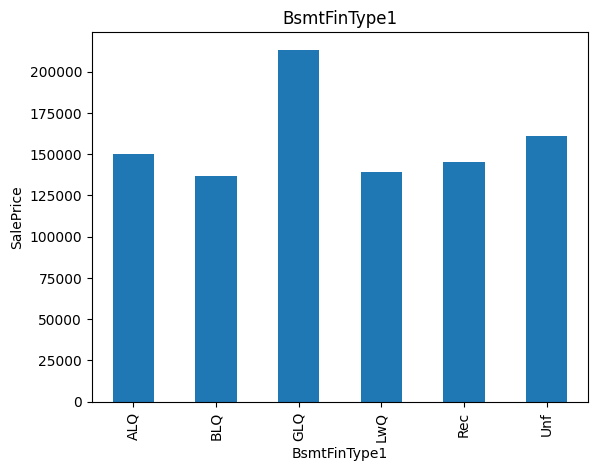

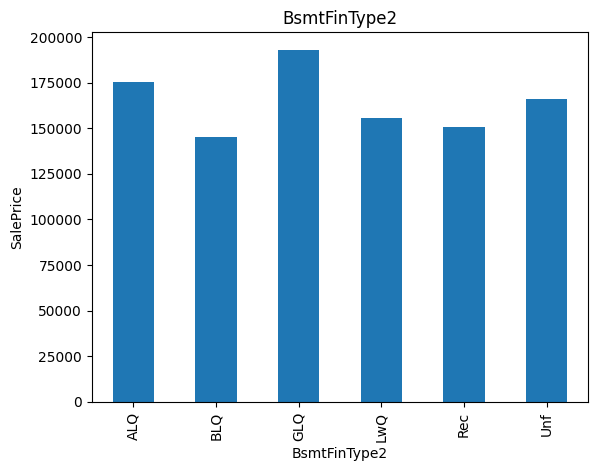

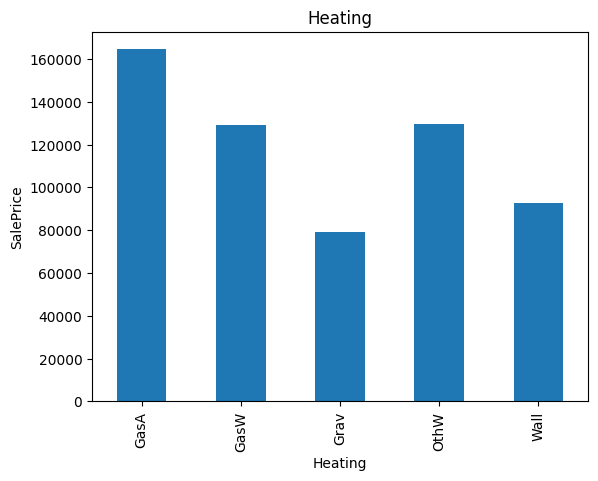

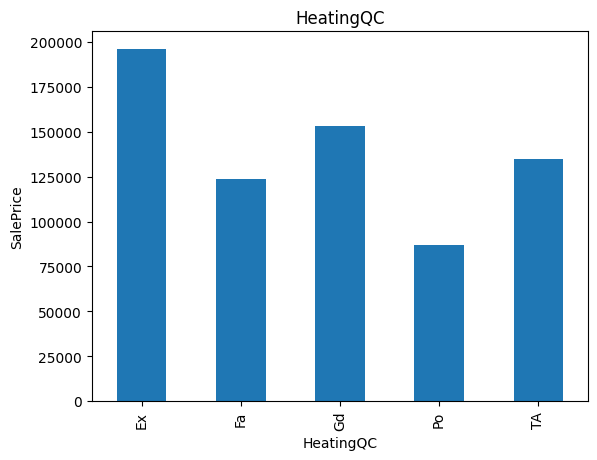

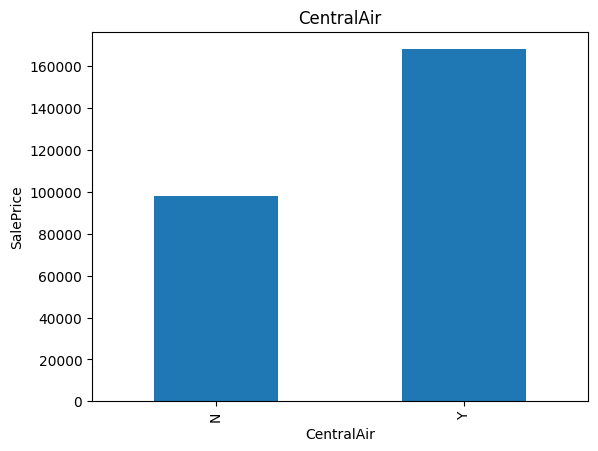

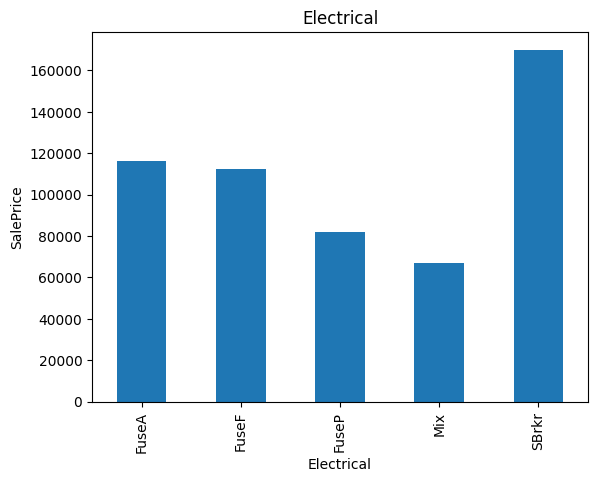

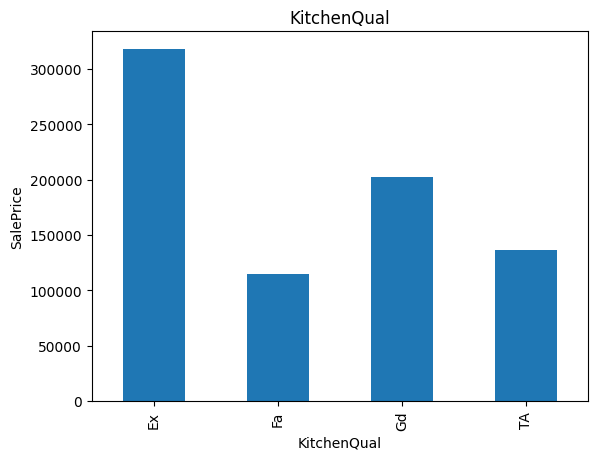

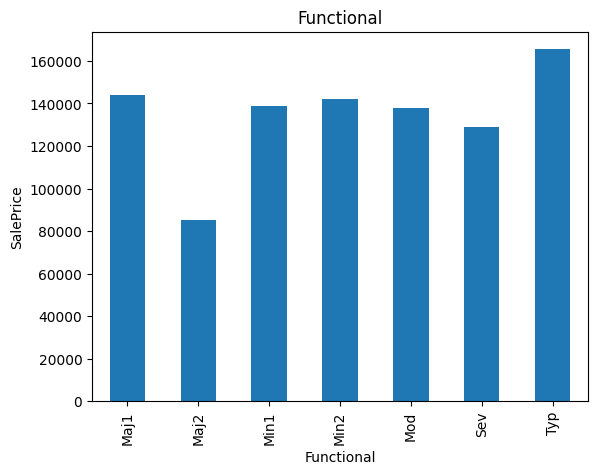

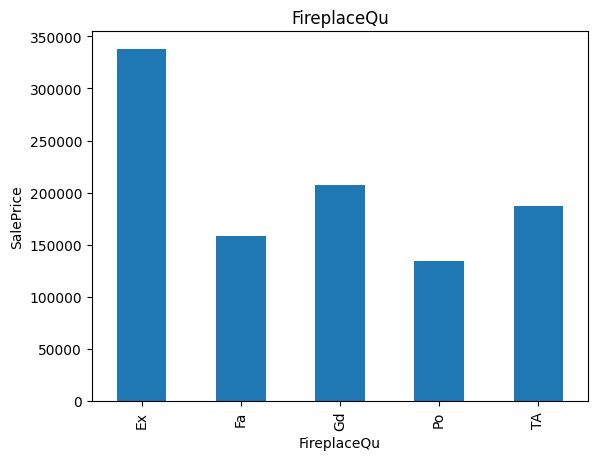

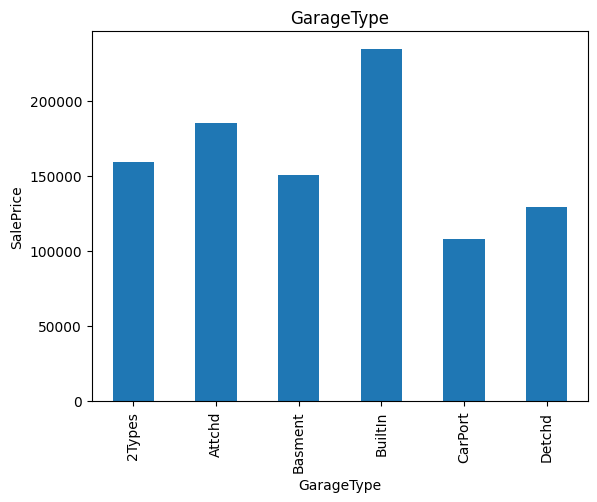

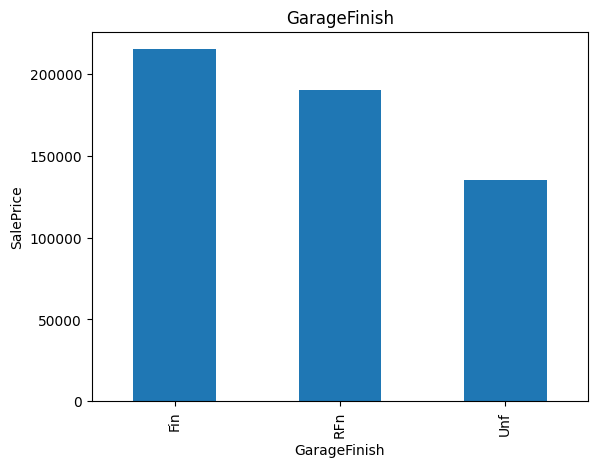

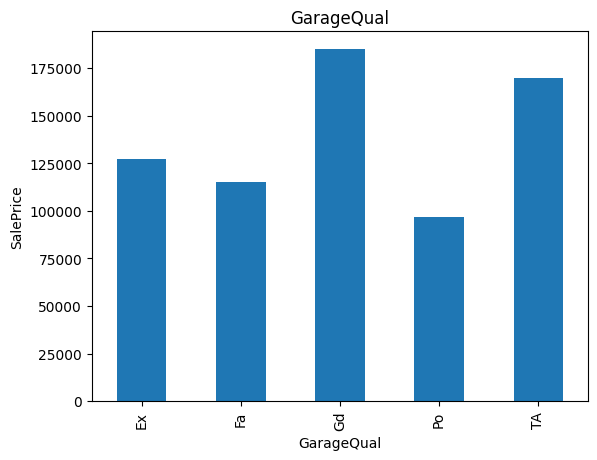

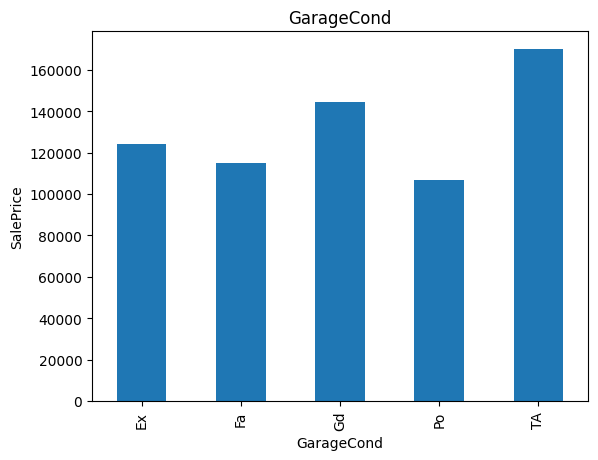

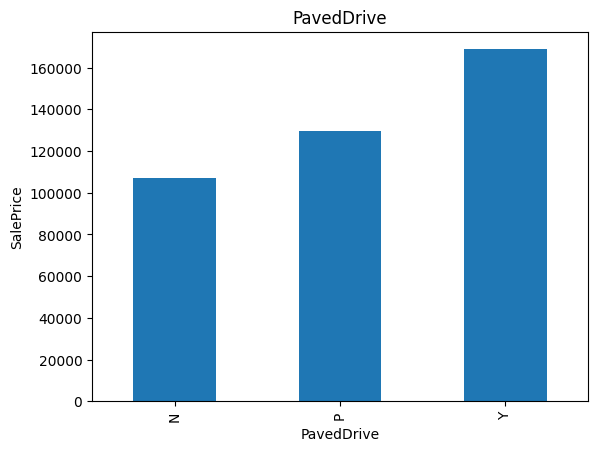

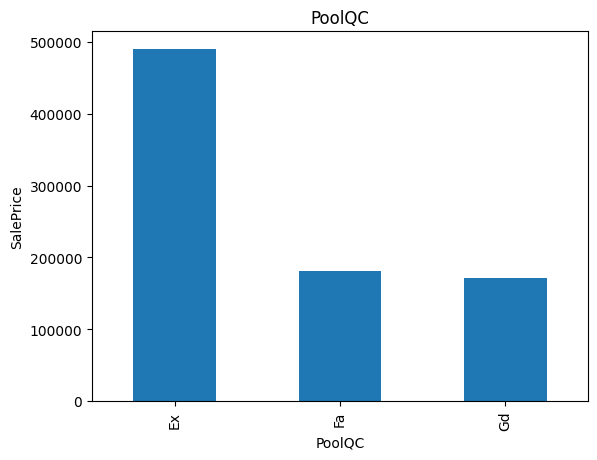

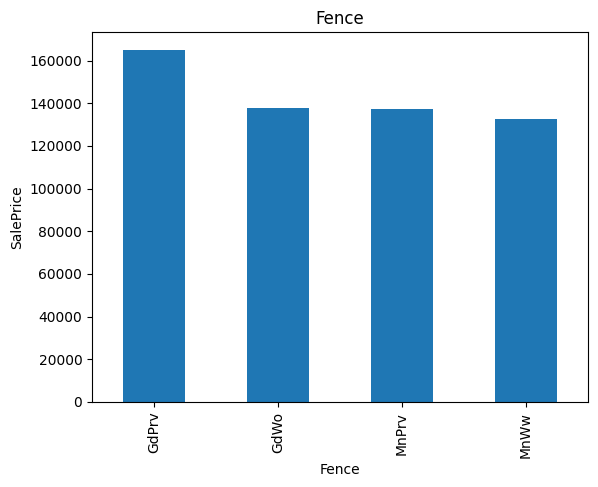

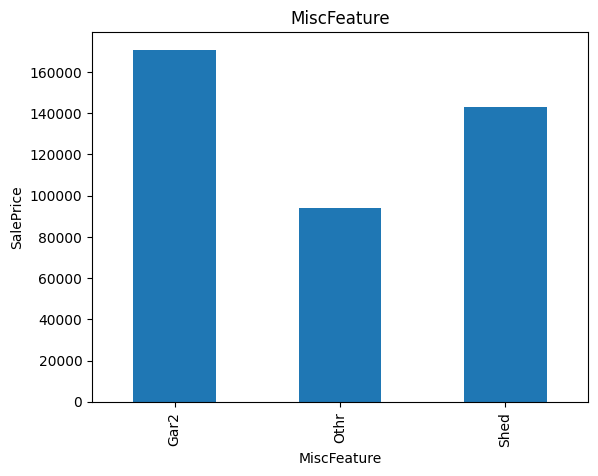

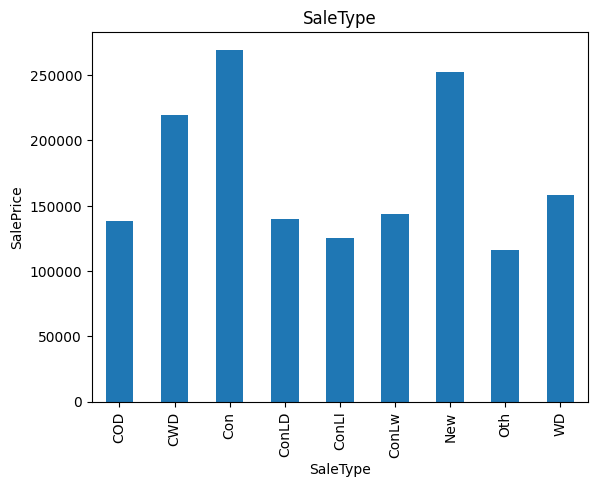

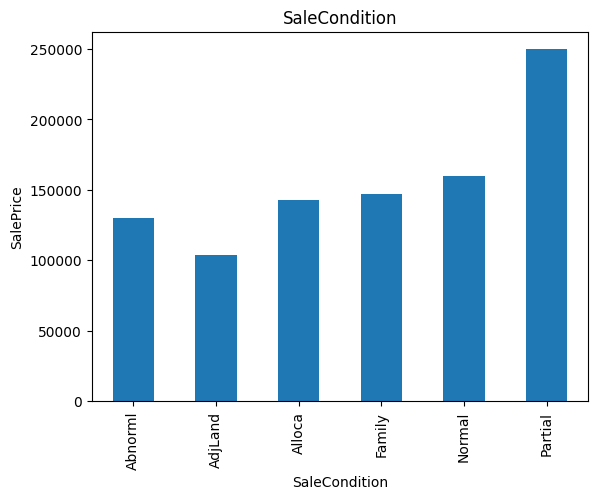

In [26]:
#visualize the data between categorical feature and the salesprice
for feature in categorical_features:
    data=dataset.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

## Advanced Housing Prices- Feature Engineering (train.csv)

We will be performing all the below steps in Feature Engineering

1. Missing values
2. Temporal variables
3. Categorical variables: remove rare labels
4. Standarise the values of the variables to the same range

In [27]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)
PATH = "/mnt/user/data/HousingPriceRegression"

In [28]:
train=pd.read_csv(os.path.join(PATH, "train.csv"))
test=pd.read_csv(os.path.join(PATH, "test.csv"))
dataset = pd.concat([train, test], ignore_index=True, sort=False)
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


## Always remember there way always be a chance of data leakage so we need to split the data first and then apply feature

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(dataset,dataset['SalePrice'],test_size=0.1,random_state=0)

In [30]:
X_train.shape, X_test.shape

((2446, 81), (272, 81))

## Missing Values

In [31]:
## Let us capture all the nan values
## First lets handle Categorical features which are missing
features_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes=='O']

for feature in features_nan:
    print("{}: {}% missing values".format(feature,np.round(dataset[feature].isnull().mean(),4)))

MSZoning: 0.0015% missing values
Alley: 0.9327% missing values
Utilities: 0.0007% missing values
MasVnrType: 0.0085% missing values
BsmtQual: 0.0291% missing values
BsmtCond: 0.0294% missing values
BsmtExposure: 0.0294% missing values
BsmtFinType1: 0.0283% missing values
BsmtFinType2: 0.0287% missing values
Functional: 0.0007% missing values
FireplaceQu: 0.489% missing values
GarageType: 0.0541% missing values
GarageFinish: 0.0548% missing values
GarageQual: 0.0548% missing values
GarageCond: 0.0548% missing values
PoolQC: 0.9974% missing values
Fence: 0.805% missing values
MiscFeature: 0.9625% missing values


In [32]:
## Replace missing value with a new label
def replace_cat_feature(dataset,features_nan):
    data=dataset.copy()
    data[features_nan]=data[features_nan].fillna('Missing')
    return data

dataset=replace_cat_feature(dataset,features_nan)

dataset[features_nan].isnull().sum()

MSZoning        0
Alley           0
Utilities       0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Functional      0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [33]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000.0


In [34]:
## Now lets check for numerical variables the contains missing values
numerical_with_nan=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 and dataset[feature].dtypes!='O']

## We will print the numerical nan variables and percentage of missing values

for feature in numerical_with_nan:
    print("{}: {}% missing value".format(feature,np.around(dataset[feature].isnull().mean(),4)))

LotFrontage: 0.1637% missing value
MasVnrArea: 0.0081% missing value
BsmtFullBath: 0.0007% missing value
BsmtHalfBath: 0.0007% missing value
GarageYrBlt: 0.0548% missing value
SalePrice: 0.5368% missing value


In [35]:
## Replacing the numerical Missing Values

for feature in numerical_with_nan:
    ## We will replace by using median since there are outliers
    median_value=dataset[feature].median()
    
    ## create a new feature to capture nan values
    dataset[feature+'nan']=np.where(dataset[feature].isnull(),1,0)
    dataset[feature].fillna(median_value,inplace=True)
    
dataset[numerical_with_nan].isnull().sum()
    
    

LotFrontage     0
MasVnrArea      0
BsmtFullBath    0
BsmtHalfBath    0
GarageYrBlt     0
SalePrice       0
dtype: int64

In [36]:
dataset.head(50)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan,SalePricenan
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500.0,0,0,0,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500.0,0,0,0,0,0,0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500.0,0,0,0,0,0,0
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000.0,0,0,0,0,0,0
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000.0,0,0,0,0,0,0
5,6,50,RL,85.0,14115,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732.0,Unf,0.0,64.0,796.0,GasA,Ex,Y,SBrkr,796,566,0,1362,1.0,0.0,1,1,1,1,TA,5,Typ,0,Missing,Attchd,1993.0,Unf,2.0,480.0,TA,TA,Y,40,30,0,320,0,0,Missing,MnPrv,Shed,700,10,2009,WD,Normal,143000.0,0,0,0,0,0,0
6,7,20,RL,75.0,10084,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369.0,Unf,0.0,317.0,1686.0,GasA,Ex,Y,SBrkr,1694,0,0,1694,1.0,0.0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2.0,636.0,TA,TA,Y,255,57,0,0,0,0,Missing,Missing,Missing,0,8,2007,WD,Normal,307000.0,0,0,0,0,0,0
7,8,60,RL,68.0,10382,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859.0,BLQ,32.0,216.0,1107.0,GasA,Ex,Y,SBrkr,1107,983,0,2090,1.0,0.0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2.0,484.0,TA,TA,Y,235,204,228,0,0,0,Missing,Missing,Shed,350,11,2009,WD,Normal,200000.0,1,0,0,0,0,0
8,9,50,RM,51.0,6120,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,OldTown

In [37]:
## Temporal Variables (Date Time Variables)

for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
       
    dataset[feature]=dataset['YrSold']-dataset[feature]

In [38]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan,SalePricenan
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500.0,0,0,0,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500.0,0,0,0,0,0,0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500.0,0,0,0,0,0,0
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000.0,0,0,0,0,0,0
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000.0,0,0,0,0,0,0


In [39]:
dataset[['YearBuilt','YearRemodAdd','GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
0,5,5,5.0
1,31,31,31.0
2,7,6,7.0
3,91,36,8.0
4,8,8,8.0


## Numerical Variables
Since the numerical variables are skewed we will perform log normal distribution

In [40]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan,SalePricenan
0,1,60,RL,65.0,8450,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,208500.0,0,0,0,0,0,0
1,2,20,RL,80.0,9600,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,181500.0,0,0,0,0,0,0
2,3,60,RL,68.0,11250,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,223500.0,0,0,0,0,0,0
3,4,70,RL,60.0,9550,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,140000.0,0,0,0,0,0,0
4,5,60,RL,84.0,14260,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,250000.0,0,0,0,0,0,0


In [41]:
import numpy as np
num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

for feature in num_features:
    dataset[feature]=np.log(dataset[feature])

In [42]:
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan,SalePricenan
0,1,60,RL,4.174387,9.041922,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1.0,0.0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,12.247694,0,0,0,0,0,0
1,2,20,RL,4.382027,9.169518,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,12.109011,0,0,0,0,0,0
2,3,60,RL,4.219508,9.328123,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,12.317167,0,0,0,0,0,0
3,4,70,RL,4.094345,9.164296,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,11.849398,0,0,0,0,0,0
4,5,60,RL,4.430817,9.565214,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,12.429216,0,0,0,0,0,0


## Handling Rare Categorical Feature

We will remove categorical variables that are present less than 1% of the observations

In [43]:
categorical_features=[feature for feature in dataset.columns if dataset[feature].dtype=='O']

In [44]:
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [45]:
temp = dataset.groupby(feature)['SalePrice'].count()/len(dataset)
temp[temp>0.01].index

Float64Index([12.004568269319446], dtype='float64', name='SalePrice')

In [46]:
for feature in categorical_features:
    temp=dataset.groupby(feature)['SalePrice'].count()/len(dataset)
    temp_df=temp[temp>0.01].index
    dataset[feature]=np.where(dataset[feature].isin(temp_df),dataset[feature],'Rare_var')
    
    

In [47]:
dataset.head(100)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan,SalePricenan
0,1,60,RL,4.174387,9.041922,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,5,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,6.752270,854,0,7.444249,1.0,0.0,2,1,3,1,Gd,8,Typ,0,Missing,Attchd,5.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,Missing,Missing,Missing,0,2,2008,WD,Normal,12.247694,0,0,0,0,0,0
1,2,20,RL,4.382027,9.169518,Pave,Missing,Reg,Lvl,AllPub,FR2,Gtl,Rare_var,Feedr,Norm,1Fam,1Story,6,8,31,31,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,7.140453,0,0,7.140453,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,31.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,Missing,Missing,Missing,0,5,2007,WD,Normal,12.109011,0,0,0,0,0,0
2,3,60,RL,4.219508,9.328123,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,7,6,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,6.824374,866,0,7.487734,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,7.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,Missing,Missing,Missing,0,9,2008,WD,Normal,12.317167,0,0,0,0,0,0
3,4,70,RL,4.094345,9.164296,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,91,36,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,6.867974,756,0,7.448334,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,8.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,Missing,Missing,Missing,0,2,2006,WD,Abnorml,11.849398,0,0,0,0,0,0
4,5,60,RL,4.430817,9.565214,Pave,Missing,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,8,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,7.043160,1053,0,7.695303,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,8.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,Missing,Missing,Missing,0,12,2008,WD,Normal,12.429216,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,60,RL,4.219508,9.186560,Pave,Missing,IR2,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,8,16,16,Gable,CompShg,VinylSd,VinylSd,BrkFace,68.0,Ex,Gd,PConc,Gd,Gd,No,ALQ,310.0,Unf,0.0,370.0,680.0,GasA,Gd,Y,SBrkr,6.522093,790,0,7.293018,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,BuiltIn,16.0,Fin,2.0,420.0,TA,TA,Y,232,63,0,0,0,0,Missing,Missing,Shed,480,4,2009,WD,Normal,12.128111,1,0,0,0,0,0
96,97,20,RL,4.356709,9.236398,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,7,7,Gable,CompShg,VinylSd,VinylSd,BrkFace,183.0,Gd,TA,PConc,Gd,TA,Av,ALQ,1162.0,Unf,0.0,426.0,1588.0,GasA,Ex,Y,SBrkr,7.370231,0,0,7.370231,0.0,0.0,2,0,3,1,Gd,6,Typ,0,Missing,Attchd,7.0,RFn,2.0,472.0,TA,TA,Y,158,29,0,0,0,0,Missing,Missing,Missing,0,8,2006,WD,Normal,12.273731,0,0,0,0,0,0
97,98,20,RL,4.2

In [48]:
for feature in categorical_features:
    labels_ordered=dataset.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    dataset[feature]=dataset[feature].map(labels_ordered)

In [49]:
dataset.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan,SalePricenan
0,1,60,2,4.174387,9.041922,1,2,0,1,1,0,0,14,4,1,3,5,7,5,5,5,1,0,10,10,2,196.0,2,3,4,3,3,1,6,706.0,5,0.0,150.0,856.0,1,4,1,3,6.752270,854,0,7.444249,1.0,0.0,2,1,3,1,3,8,4,0,1,4,5.0,2,2.0,548.0,3,3,2,0,61,0,0,0,0,0,4,2,0,2,2008,2,3,12.247694,0,0,0,0,0,0
1,2,20,2,4.382027,9.169518,1,2,0,1,1,2,0,9,1,1,3,4,6,8,31,31,1,0,3,3,0,0.0,1,3,2,3,3,4,4,978.0,5,0.0,284.0,1262.0,1,4,1,3,7.140453,0,0,7.140453,0.0,1.0,2,0,3,1,1,6,4,1,3,4,31.0,2,2.0,460.0,3,3,2,298,0,0,0,0,0,0,4,2,0,5,2007,2,3,12.109011,0,0,0,0,0,0
2,3,60,2,4.219508,9.328123,1,2,1,1,1,0,0,14,4,1,3,5,7,5,7,6,1,0,10,10,2,162.0,2,3,4,3,3,2,6,486.0,5,0.0,434.0,920.0,1,4,1,3,6.824374,866,0,7.487734,1.0,0.0,2,1,3,1,3,6,4,1,3,4,7.0,2,2.0,608.0,3,3,2,0,42,0,0,0,0,0,4,2,0,9,2008,2,3,12.317167,0,0,0,0,0,0
3,4,70,2,4.094345,9.164296,1,2,1,1,1,3,0,13,4,1,3,5,7,5,91,36,1,0,2,4,0,0.0,1,3,1,2,4,1,4,216.0,5,0.0,540.0,756.0,1,3,1,3,6.867974,756,0,7.448334,1.0,0.0,1,0,3,1,3,7,4,1,4,2,8.0,1,3.0,642.0,3,3,2,0,35,272,0,0,0,0,4,2,0,2,2006,2,0,11.849398,0,0,0,0,0,0
4,5,60,2,4.430817,9.565214,1,2,1,1,1,2,0,20,4,1,3,5,8,5,8,8,1,0,10,10,2,350.0,2,3,4,3,3,3,6,655.0,5,0.0,490.0,1145.0,1,4,1,3,7.043160,1053,0,7.695303,1.0,0.0,2,1,4,1,3,9,4,1,3,4,8.0,2,3.0,836.0,3,3,2,192,84,0,0,0,0,0,4,2,0,12,2008,2,3,12.429216,0,0,0,0,0,0
5,6,50,2,4.442651,9.554993,1,2,1,1,1,0,0,8,4,1,3,1,5,5,16,14,1,0,10,10,0,0.0,1,3,3,3,3,1,6,732.0,5,0.0,64.0,796.0,1,4,1,3,6.679599,566,0,7.216709,1.0,0.0,1,1,1,1,1,5,4,0,1,4,16.0,1,2.0,480.0,3,3,2,40,30,0,320,0,0,0,2,1,700,10,2009,2,3,11.870600,0,0,0,0,0,0
6,7,20,2,4.317488,9.218705,1,2,0,1,1,0,0,15,4,1,3,4,8,5,3,2,1,0,10,10,3,186.0,2,3,4,4,3,3,6,1369.0,5,0.0,317.0,1686.0,1,4,1,3,7.434848,0,0,7.434848,1.0,0.0,2,0,3,1,3,7,4,1,4,4,3.0,2,2.0,636.0,3,3,2,255,57,0,0,0,0,0,4,2,0,8,2007,2,3,12.634603,0,0,0,0,0,0
7,8,60,2,4.219508,9.247829,1,2,1,1,1,3,0,11,5,1,3,5,7,6,36,36,1,0,6,5,3,240.0,1,3,2,3,3,2,4,859.0,1,32.0,216.0,1107.0,1,4,1,3,7.009409,983,0,7.644919,1.0,0.0,2,1,3,1,1,7,4,2,3,4,36.0,2,2.0,484.0,3,3,2,235,204,228,0,0,0,0,4,1,350,11,2009,2,3,12.206073,1,0,0,0,0,0
8,9,50,1,3.931826,8.719317,1,2,0,1,1,0,0,4,0,1,3,1,7,5,77,58,1,0,8,4,0,0.0,1,3,1,2,3,1,5,0.0,5,0.0,952.0,952.0,1,3,1,1,6.929517,752,0,7.480992,0.0,0.0,2,0,2,2,1,8,1,2,3,2,77.0,1,2.0,468.0,1,3,2,90,0,205,0,0,0,0,4,2,0,4,2008,2,0,11.774520,0,0,0,0,0,0
9,10,190,2,3.912023,8.911934,1,2,0,1,1,3,0,2,0,0,0,0,5,6,69,58,1,0,3,3,0,0.0,1,3,1,2,3,1,6,851.0,5,0.0,140.0,991.0,1,4,1,3,6.981935,0,0,6.981935,1.0,0.0,1,0,2,2,1,5,4,2,3,4,69.0,2,1.0,205.0,2,3,2,0,4,0,0,0,0,0,4,2,0,1,2008,2,3,11.678440,0,0,0,0,0,0


In [50]:
scaling_feature=[feature for feature in dataset.columns if feature not in ['Id','SalePerice'] ]
len(scaling_feature)

86

In [51]:
scaling_feature

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'Enc

In [52]:
dataset.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan,SalePricenan
2713,2915,160,1,3.044522,7.568379,1,2,0,1,1,0,0,0,4,1,2,5,4,7,36,36,1,0,9,9,0,0.0,1,3,2,2,3,1,5,0.0,5,0.0,546.0,546.0,1,3,1,3,6.302619,546,0,6.995766,0.0,0.0,1,1,3,1,1,5,4,0,1,0,27.0,0,0.0,0.0,0,0,2,0,0,0,0,0,0,0,4,2,0,6,2006,2,3,12.004568,0,0,0,0,1,1
2714,2916,160,1,3.044522,7.546446,1,2,0,1,1,0,0,0,4,1,4,5,4,5,36,36,1,0,9,9,0,0.0,1,3,2,2,3,1,2,252.0,5,0.0,294.0,546.0,1,2,1,3,6.302619,546,0,6.995766,0.0,0.0,1,1,3,1,1,6,4,0,1,1,36.0,1,1.0,286.0,3,3,2,0,24,0,0,0,0,0,4,2,0,4,2006,2,0,12.004568,0,0,0,0,0,1
2715,2917,20,2,5.075174,9.903488,1,2,0,1,1,0,0,8,4,1,3,4,5,7,46,10,1,0,10,10,0,0.0,1,3,2,2,3,1,4,1224.0,5,0.0,0.0,1224.0,1,4,1,3,7.109879,0,0,7.109879,1.0,0.0,1,0,4,1,1,7,4,1,3,2,46.0,1,2.0,576.0,3,3,2,474,0,0,0,0,0,0,4,2,0,9,2006,2,0,12.004568,0,0,0,0,0,1
2716,2918,85,2,4.127134,9.253496,1,2,0,1,1,0,0,8,4,1,3,2,5,5,14,14,1,0,6,4,0,0.0,1,3,4,3,3,3,6,337.0,5,0.0,575.0,912.0,1,2,1,3,6.877296,0,0,6.877296,0.0,1.0,1,0,3,1,1,6,4,0,1,0,27.0,0,0.0,0.0,0,0,2,80,32,0,0,0,0,0,2,1,700,7,2006,2,3,12.004568,0,0,0,0,1,1
2717,2919,60,2,4.304065,9.172327,1,2,0,1,1,0,1,8,4,1,3,5,7,5,13,12,1,0,6,5,2,94.0,1,3,4,3,3,3,3,758.0,5,0.0,238.0,996.0,1,4,1,3,6.903747,1004,0,7.600902,0.0,0.0,2,1,3,1,1,9,4,1,3,4,13.0,3,3.0,650.0,3,3,2,190,48,0,0,0,0,0,4,2,0,11,2006,2,3,12.004568,0,0,0,0,0,1


## Feature Scaling

In [53]:
feature_scale=[feature for feature in dataset.columns if feature not in ['Id','SalePrice']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(dataset[feature_scale])

MinMaxScaler()

In [54]:
scaler.transform(dataset[feature_scale])

array([[0.23529412, 0.66666667, 0.41820812, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.66666667, 0.49506375, ..., 0.        , 0.        ,
        0.        ],
       [0.23529412, 0.66666667, 0.434909  , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.66666667, 0.75162522, ..., 0.        , 0.        ,
        1.        ],
       [0.38235294, 0.66666667, 0.40071794, ..., 0.        , 1.        ,
        1.        ],
       [0.23529412, 0.66666667, 0.46620707, ..., 0.        , 0.        ,
        1.        ]])

In [55]:
# transform the train and test set, and add on the Id and SalePrice variables
data = pd.concat([dataset[['Id', 'SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(dataset[feature_scale]), columns=feature_scale)],
                    axis=1)

In [56]:
data.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan,SalePricenan
0,1,12.247694,0.235294,0.666667,0.418208,0.366344,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.70,0.8,1.0,0.75,1.0,0.666667,0.500,0.044118,0.112903,0.5,0.0,1.0,1.0,0.666667,0.12250,0.666667,1.0,1.00,0.75,0.75,0.25,1.000000,0.176060,0.833333,0.0,0.064212,0.168008,1.0,1.00,1.0,1.0,0.345385,0.413559,0.0,0.599333,0.333333,0.0,0.50,0.5,0.375,0.333333,0.75,0.461538,1.0,0.00,0.2,0.8,0.652866,0.666667,0.4,0.368280,1.0,1.0,1.0,0.000000,0.082210,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.50,0.666667,0.75,0.0,0.0,0.0,0.0,0.0,0.0
1,2,12.109011,0.000000,0.666667,0.495064,0.391317,1.0,1.0,0.000000,0.333333,1.0,0.50,0.0,0.45,0.2,1.0,0.75,0.8,0.555556,0.875,0.235294,0.532258,0.5,0.0,0.3,0.3,0.000000,0.00000,0.333333,1.0,0.50,0.75,0.75,1.00,0.666667,0.243890,0.833333,0.0,0.121575,0.247694,1.0,1.00,1.0,1.0,0.487844,0.000000,0.0,0.487844,0.000000,0.5,0.50,0.0,0.375,0.333333,0.25,0.307692,1.0,0.25,0.6,0.8,0.735669,0.666667,0.4,0.309140,1.0,1.0,1.0,0.209270,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.363636,0.25,0.666667,0.75,0.0,0.0,0.0,0.0,0.0,0.0
2,3,12.317167,0.235294,0.666667,0.434909,0.422359,1.0,1.0,0.333333,0.333333,1.0,0.00,0.0,0.70,0.8,1.0,0.75,1.0,0.666667,0.500,0.058824,0.129032,0.5,0.0,1.0,1.0,0.666667,0.10125,0.666667,1.0,1.00,0.75,0.75,0.50,1.000000,0.121197,0.833333,0.0,0.185788,0.180569,1.0,1.00,1.0,1.0,0.371846,0.419370,0.0,0.615292,0.333333,0.0,0.50,0.5,0.375,0.333333,0.75,0.307692,1.0,0.25,0.6,0.8,0.659236,0.666667,0.4,0.408602,1.0,1.0,1.0,0.000000,0.056604,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.727273,0.50,0.666667,0.75,0.0,0.0,0.0,0.0,0.0,0.0
3,4,11.849398,0.294118,0.666667,0.388581,0.390295,1.0,1.0,0.333333,0.333333,1.0,0.75,0.0,0.65,0.8,1.0,0.75,1.0,0.666667,0.500,0.676471,0.612903,0.5,0.0,0.2,0.4,0.000000,0.00000,0.333333,1.0,0.25,0.50,1.00,0.25,0.666667,0.053865,0.833333,0.0,0.231164,0.148381,1.0,0.75,1.0,1.0,0.387847,0.366102,0.0,0.600833,0.333333,0.0,0.25,0.0,0.375,0.333333,0.75,0.384615,1.0,0.25,0.8,0.4,0.662420,0.333333,0.6,0.431452,1.0,1.0,1.0,0.000000,0.047170,0.268775,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.00,0.666667,0.00,0.0,0.0,0.0,0.0,0.0,0.0
4,5,12.429216,0.235294,0.666667,0.513123,0.468761,1.0,1.0,0.333333,0.333333,1.0,0.50,0.0,1.00,0.8,1.0,0.75,1.0,0.777778,0.500,0.066176,0.161290,0.5,0.0,1.0,1.0,0.666667,0.21875,0.666667,1.0,1.00,0.75,0.75,0.75,1.000000,0.163342,0.833333,0.0,0.209760,0.224730,1.0,1.00,1.0,1.0,0.452138,0.509927,0.0,0.691468,0.333333,0.0,0.50,0.5,0.500,0.333333,0.75,0.538462,1.0,0.25,0.6,0.8,0.662420,0.666667,0.6,0.561828,1.0,1.0,1.0,0.134831,0.113208,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.000000,0.50,0.666667,0.75,0.0,0.0,0.0,0.0,0.0,0.0


In [57]:
data.rename(columns = {"1stFlrSF" : "FirstFlrSF","2ndFlrSF": "SecondFlrSF", "3SsnPorch": "ThirdSsnPorch"}, inplace=True)

In [58]:
data

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,FirstFlrSF,SecondFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ThirdSsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan,SalePricenan
0,1,12.247694,0.235294,0.666667,0.418208,0.366344,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.70,0.8,1.0,0.75,1.0,0.666667,0.500,0.044118,0.112903,0.5,0.0,1.0,1.0,0.666667,0.12250,0.666667,1.0,1.00,0.75,0.75,0.25,1.000000,0.176060,0.833333,0.0,0.064212,0.168008,1.0,1.00,1.0,1.0,0.345385,0.413559,0.0,0.599333,0.333333,0.0,0.50,0.5,0.375,0.333333,0.75,0.461538,1.0,0.00,0.2,0.8,0.652866,0.666667,0.4,0.368280,1.0,1.0,1.0,0.000000,0.082210,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.000000,0.090909,0.50,0.666667,0.75,0.0,0.0,0.0,0.0,0.0,0.0
1,2,12.109011,0.000000,0.666667,0.495064,0.391317,1.0,1.0,0.000000,0.333333,1.0,0.50,0.0,0.45,0.2,1.0,0.75,0.8,0.555556,0.875,0.235294,0.532258,0.5,0.0,0.3,0.3,0.000000,0.00000,0.333333,1.0,0.50,0.75,0.75,1.00,0.666667,0.243890,0.833333,0.0,0.121575,0.247694,1.0,1.00,1.0,1.0,0.487844,0.000000,0.0,0.487844,0.000000,0.5,0.50,0.0,0.375,0.333333,0.25,0.307692,1.0,0.25,0.6,0.8,0.735669,0.666667,0.4,0.309140,1.0,1.0,1.0,0.209270,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.000000,0.363636,0.25,0.666667,0.75,0.0,0.0,0.0,0.0,0.0,0.0
2,3,12.317167,0.235294,0.666667,0.434909,0.422359,1.0,1.0,0.333333,0.333333,1.0,0.00,0.0,0.70,0.8,1.0,0.75,1.0,0.666667,0.500,0.058824,0.129032,0.5,0.0,1.0,1.0,0.666667,0.10125,0.666667,1.0,1.00,0.75,0.75,0.50,1.000000,0.121197,0.833333,0.0,0.185788,0.180569,1.0,1.00,1.0,1.0,0.371846,0.419370,0.0,0.615292,0.333333,0.0,0.50,0.5,0.375,0.333333,0.75,0.307692,1.0,0.25,0.6,0.8,0.659236,0.666667,0.4,0.408602,1.0,1.0,1.0,0.000000,0.056604,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.000000,0.727273,0.50,0.666667,0.75,0.0,0.0,0.0,0.0,0.0,0.0
3,4,11.849398,0.294118,0.666667,0.388581,0.390295,1.0,1.0,0.333333,0.333333,1.0,0.75,0.0,0.65,0.8,1.0,0.75,1.0,0.666667,0.500,0.676471,0.612903,0.5,0.0,0.2,0.4,0.000000,0.00000,0.333333,1.0,0.25,0.50,1.00,0.25,0.666667,0.053865,0.833333,0.0,0.231164,0.148381,1.0,0.75,1.0,1.0,0.387847,0.366102,0.0,0.600833,0.333333,0.0,0.25,0.0,0.375,0.333333,0.75,0.384615,1.0,0.25,0.8,0.4,0.662420,0.333333,0.6,0.431452,1.0,1.0,1.0,0.000000,0.047170,0.268775,0.0,0.0,0.0,0.0,1.0,1.0,0.000000,0.090909,0.00,0.666667,0.00,0.0,0.0,0.0,0.0,0.0,0.0
4,5,12.429216,0.235294,0.666667,0.513123,0.468761,1.0,1.0,0.333333,0.333333,1.0,0.50,0.0,1.00,0.8,1.0,0.75,1.0,0.777778,0.500,0.066176,0.161290,0.5,0.0,1.0,1.0,0.666667,0.21875,0.666667,1.0,1.00,0.75,0.75,0.75,1.000000,0.163342,0.833333,0.0,0.209760,0.224730,1.0,1.00,1.0,1.0,0.452138,0.509927,0.0,0.691468,0.333333,0.0,0.50,0.5,0.500,0.333333,0.75,0.538462,1.0,0.25,0.6,0.8,0.662420,0.666667,0.6,0.561828,1.0,1.0,1.0,0.134831,0.113208,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.000000,1.000000,0.50,0.666667,0.75,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2713,2915,12.004568,0.823529,0.333333,0.0000

## Get Train Data

In [59]:
train = data[data['Id'].between(1, 1259)]

In [60]:
train.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,FirstFlrSF,SecondFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ThirdSsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan,SalePricenan
0,1,12.247694,0.235294,0.666667,0.418208,0.366344,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.70,0.8,1.0,0.75,1.0,0.666667,0.500,0.044118,0.112903,0.5,0.0,1.0,1.0,0.666667,0.12250,0.666667,1.0,1.00,0.75,0.75,0.25,1.000000,0.176060,0.833333,0.0,0.064212,0.168008,1.0,1.00,1.0,1.0,0.345385,0.413559,0.0,0.599333,0.333333,0.0,0.50,0.5,0.375,0.333333,0.75,0.461538,1.0,0.00,0.2,0.8,0.652866,0.666667,0.4,0.368280,1.0,1.0,1.0,0.000000,0.082210,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.50,0.666667,0.75,0.0,0.0,0.0,0.0,0.0,0.0
1,2,12.109011,0.000000,0.666667,0.495064,0.391317,1.0,1.0,0.000000,0.333333,1.0,0.50,0.0,0.45,0.2,1.0,0.75,0.8,0.555556,0.875,0.235294,0.532258,0.5,0.0,0.3,0.3,0.000000,0.00000,0.333333,1.0,0.50,0.75,0.75,1.00,0.666667,0.243890,0.833333,0.0,0.121575,0.247694,1.0,1.00,1.0,1.0,0.487844,0.000000,0.0,0.487844,0.000000,0.5,0.50,0.0,0.375,0.333333,0.25,0.307692,1.0,0.25,0.6,0.8,0.735669,0.666667,0.4,0.309140,1.0,1.0,1.0,0.209270,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.363636,0.25,0.666667,0.75,0.0,0.0,0.0,0.0,0.0,0.0
2,3,12.317167,0.235294,0.666667,0.434909,0.422359,1.0,1.0,0.333333,0.333333,1.0,0.00,0.0,0.70,0.8,1.0,0.75,1.0,0.666667,0.500,0.058824,0.129032,0.5,0.0,1.0,1.0,0.666667,0.10125,0.666667,1.0,1.00,0.75,0.75,0.50,1.000000,0.121197,0.833333,0.0,0.185788,0.180569,1.0,1.00,1.0,1.0,0.371846,0.419370,0.0,0.615292,0.333333,0.0,0.50,0.5,0.375,0.333333,0.75,0.307692,1.0,0.25,0.6,0.8,0.659236,0.666667,0.4,0.408602,1.0,1.0,1.0,0.000000,0.056604,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.727273,0.50,0.666667,0.75,0.0,0.0,0.0,0.0,0.0,0.0
3,4,11.849398,0.294118,0.666667,0.388581,0.390295,1.0,1.0,0.333333,0.333333,1.0,0.75,0.0,0.65,0.8,1.0,0.75,1.0,0.666667,0.500,0.676471,0.612903,0.5,0.0,0.2,0.4,0.000000,0.00000,0.333333,1.0,0.25,0.50,1.00,0.25,0.666667,0.053865,0.833333,0.0,0.231164,0.148381,1.0,0.75,1.0,1.0,0.387847,0.366102,0.0,0.600833,0.333333,0.0,0.25,0.0,0.375,0.333333,0.75,0.384615,1.0,0.25,0.8,0.4,0.662420,0.333333,0.6,0.431452,1.0,1.0,1.0,0.000000,0.047170,0.268775,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.00,0.666667,0.00,0.0,0.0,0.0,0.0,0.0,0.0
4,5,12.429216,0.235294,0.666667,0.513123,0.468761,1.0,1.0,0.333333,0.333333,1.0,0.50,0.0,1.00,0.8,1.0,0.75,1.0,0.777778,0.500,0.066176,0.161290,0.5,0.0,1.0,1.0,0.666667,0.21875,0.666667,1.0,1.00,0.75,0.75,0.75,1.000000,0.163342,0.833333,0.0,0.209760,0.224730,1.0,1.00,1.0,1.0,0.452138,0.509927,0.0,0.691468,0.333333,0.0,0.50,0.5,0.500,0.333333,0.75,0.538462,1.0,0.25,0.6,0.8,0.662420,0.666667,0.6,0.561828,1.0,1.0,1.0,0.134831,0.113208,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.000000,0.50,0.666667,0.75,0.0,0.0,0.0,0.0,0.0,0.0


## Get Test Data

In [61]:
test = data[data['Id'].between(1460, 2919)]

In [62]:
test = test.drop('SalePrice', axis=1)
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,FirstFlrSF,SecondFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ThirdSsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan,SalePricenan
1259,1461,0.000000,0.000000,0.495064,0.428726,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.35,0.2,1.0,0.75,0.8,0.444444,0.625,0.367647,0.822581,0.5,0.0,1.0,1.0,0.000000,0.0000,0.333333,1.0,0.5,0.50,0.75,0.25,0.333333,0.116708,0.333333,0.094364,0.115582,0.173111,1.0,0.50,1.0,1.0,0.362145,0.000000,0.0,0.362145,0.0,0.0,0.25,0.0,0.250,0.333333,0.25,0.230769,1.0,0.00,0.2,0.8,0.792994,0.333333,0.2,0.490591,1.0,1.0,1.0,0.098315,0.000000,0.0,0.0,0.208333,0.0,0.0,0.5,1.0,0.000000,0.454545,1.0,0.666667,0.75,0.0,0.0,0.0,0.0,0.0,1.0
1260,1462,0.000000,0.666667,0.499662,0.468857,1.0,1.0,0.333333,0.333333,1.0,0.75,0.0,0.35,0.8,1.0,0.75,0.8,0.555556,0.625,0.389706,0.870968,1.0,0.0,0.2,0.2,0.666667,0.0675,0.333333,1.0,0.5,0.50,0.75,0.25,0.666667,0.230175,0.833333,0.000000,0.173801,0.260844,1.0,0.50,1.0,1.0,0.506828,0.000000,0.0,0.506828,0.0,0.0,0.25,0.5,0.375,0.333333,0.75,0.307692,1.0,0.00,0.2,0.8,0.802548,0.333333,0.2,0.209677,1.0,1.0,1.0,0.275983,0.048518,0.0,0.0,0.000000,0.0,0.0,1.0,0.0,0.735294,0.454545,1.0,0.666667,0.75,0.0,0.0,0.0,0.0,0.0,1.0
1261,1463,0.235294,0.666667,0.466207,0.462769,1.0,1.0,0.333333,0.333333,1.0,0.00,0.0,0.60,0.8,1.0,0.75,1.0,0.444444,0.500,0.102941,0.225806,0.5,0.0,1.0,1.0,0.000000,0.0000,0.333333,1.0,1.0,0.75,0.75,0.25,1.000000,0.197257,0.833333,0.000000,0.058647,0.182139,1.0,0.75,1.0,1.0,0.375023,0.339467,0.0,0.581524,0.0,0.0,0.50,0.5,0.375,0.333333,0.25,0.307692,1.0,0.25,0.6,0.8,0.678344,1.000000,0.4,0.323925,1.0,1.0,1.0,0.148876,0.045822,0.0,0.0,0.000000,0.0,0.0,0.5,1.0,0.000000,0.181818,1.0,0.666667,0.75,0.0,0.0,0.0,0.0,0.0,1.0
1262,1464,0.235294,0.666667,0.485693,0.398875,1.0,1.0,0.333333,0.333333,1.0,0.00,0.0,0.60,0.8,1.0,0.75,1.0,0.555556,0.625,0.095588,0.225806,0.5,0.0,1.0,1.0,0.666667,0.0125,0.333333,1.0,1.0,0.50,0.75,0.25,1.000000,0.150125,0.833333,0.000000,0.138699,0.181747,1.0,1.00,1.0,1.0,0.374231,0.328329,0.0,0.575849,0.0,0.0,0.50,0.5,0.375,0.333333,0.75,0.384615,1.0,0.25,0.8,0.8,0.675159,1.000000,0.4,0.315860,1.0,1.0,1.0,0.252809,0.048518,0.0,0.0,0.000000,0.0,0.0,1.0,1.0,0.000000,0.454545,1.0,0.666667,0.75,0.0,0.0,0.0,0.0,0.0,1.0
1263,1465,0.588235,0.666667,0.265271,0.263841,1.0,1.0,0.333333,1.000000,1.0,0.00,0.0,0.95,0.8,1.0,1.00,0.8,0.777778,0.500,0.139706,0.322581,0.5,0.0,0.6,0.5,0.000000,0.0000,0.666667,1.0,1.0,0.75,0.75,0.25,0.666667,0.065586,0.833333,0.000000,0.435360,0.251227,1.0,1.00,1.0,1.0,0.493041,0.000000,0.0,0.493041,0.0,0.0,0.50,0.0,0.250,0.333333,0.75,0.230769,1.0,0.00,0.2,0.8,0.694268,0.666667,0.4,0.340054,1.0,1.0,1.0,0.000000,0.110512,0.0,0.0,0.250000,0.0,0.0,1.0,1.0,0.000000,0.000000,1.0,0.666667,0.75,0.0,0.0,0.0,0.0,0.0,1.0


## Saving Data to Project Repository.

In [63]:
train.to_csv(f'{PATH}/new_train.csv',index=False)

In [64]:
test.to_csv(f'{PATH}/new_test.csv',index=False)

## Feature Selection Advanced House Price Prediction

The main aim of this project is to predict the house price based on various features which we will discuss as we go ahead

#### Dataset to downloaded from the below link
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [65]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
%matplotlib inline

## for feature slection

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

PATH = "/mnt/user/data/HousingPriceRegression"

In [66]:
dataset=pd.read_csv(os.path.join(PATH, "new_train.csv"))

In [67]:
dataset.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,FirstFlrSF,SecondFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ThirdSsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan,SalePricenan
0,1,12.247694,0.235294,0.666667,0.418208,0.366344,1.0,1.0,0.000000,0.333333,1.0,0.00,0.0,0.70,0.8,1.0,0.75,1.0,0.666667,0.500,0.044118,0.112903,0.5,0.0,1.0,1.0,0.666667,0.12250,0.666667,1.0,1.00,0.75,0.75,0.25,1.000000,0.176060,0.833333,0.0,0.064212,0.168008,1.0,1.00,1.0,1.0,0.345385,0.413559,0.0,0.599333,0.333333,0.0,0.50,0.5,0.375,0.333333,0.75,0.461538,1.0,0.00,0.2,0.8,0.652866,0.666667,0.4,0.368280,1.0,1.0,1.0,0.000000,0.082210,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.50,0.666667,0.75,0.0,0.0,0.0,0.0,0.0,0.0
1,2,12.109011,0.000000,0.666667,0.495064,0.391317,1.0,1.0,0.000000,0.333333,1.0,0.50,0.0,0.45,0.2,1.0,0.75,0.8,0.555556,0.875,0.235294,0.532258,0.5,0.0,0.3,0.3,0.000000,0.00000,0.333333,1.0,0.50,0.75,0.75,1.00,0.666667,0.243890,0.833333,0.0,0.121575,0.247694,1.0,1.00,1.0,1.0,0.487844,0.000000,0.0,0.487844,0.000000,0.5,0.50,0.0,0.375,0.333333,0.25,0.307692,1.0,0.25,0.6,0.8,0.735669,0.666667,0.4,0.309140,1.0,1.0,1.0,0.209270,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.363636,0.25,0.666667,0.75,0.0,0.0,0.0,0.0,0.0,0.0
2,3,12.317167,0.235294,0.666667,0.434909,0.422359,1.0,1.0,0.333333,0.333333,1.0,0.00,0.0,0.70,0.8,1.0,0.75,1.0,0.666667,0.500,0.058824,0.129032,0.5,0.0,1.0,1.0,0.666667,0.10125,0.666667,1.0,1.00,0.75,0.75,0.50,1.000000,0.121197,0.833333,0.0,0.185788,0.180569,1.0,1.00,1.0,1.0,0.371846,0.419370,0.0,0.615292,0.333333,0.0,0.50,0.5,0.375,0.333333,0.75,0.307692,1.0,0.25,0.6,0.8,0.659236,0.666667,0.4,0.408602,1.0,1.0,1.0,0.000000,0.056604,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.727273,0.50,0.666667,0.75,0.0,0.0,0.0,0.0,0.0,0.0
3,4,11.849398,0.294118,0.666667,0.388581,0.390295,1.0,1.0,0.333333,0.333333,1.0,0.75,0.0,0.65,0.8,1.0,0.75,1.0,0.666667,0.500,0.676471,0.612903,0.5,0.0,0.2,0.4,0.000000,0.00000,0.333333,1.0,0.25,0.50,1.00,0.25,0.666667,0.053865,0.833333,0.0,0.231164,0.148381,1.0,0.75,1.0,1.0,0.387847,0.366102,0.0,0.600833,0.333333,0.0,0.25,0.0,0.375,0.333333,0.75,0.384615,1.0,0.25,0.8,0.4,0.662420,0.333333,0.6,0.431452,1.0,1.0,1.0,0.000000,0.047170,0.268775,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.090909,0.00,0.666667,0.00,0.0,0.0,0.0,0.0,0.0,0.0
4,5,12.429216,0.235294,0.666667,0.513123,0.468761,1.0,1.0,0.333333,0.333333,1.0,0.50,0.0,1.00,0.8,1.0,0.75,1.0,0.777778,0.500,0.066176,0.161290,0.5,0.0,1.0,1.0,0.666667,0.21875,0.666667,1.0,1.00,0.75,0.75,0.75,1.000000,0.163342,0.833333,0.0,0.209760,0.224730,1.0,1.00,1.0,1.0,0.452138,0.509927,0.0,0.691468,0.333333,0.0,0.50,0.5,0.500,0.333333,0.75,0.538462,1.0,0.25,0.6,0.8,0.662420,0.666667,0.6,0.561828,1.0,1.0,1.0,0.134831,0.113208,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.000000,0.50,0.666667,0.75,0.0,0.0,0.0,0.0,0.0,0.0


In [68]:
## Capture the dependent feature
y_train=dataset[['SalePrice']]

In [69]:
## drop dependent feature from dataset
X_train=dataset.drop(['Id','SalePrice'],axis=1)

## Apply Feature Selection
### first, I specify the Lasso Regression model, and I select a suitable alpha (equivalent of penalty). The bigger the alpha the less features that will be selected.
### Then I use the selectFromModel object from sklearn, which will select the features which coefficients are non-zero
## alpha=0.001

In [70]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.001, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.001, random_state=0))

In [71]:
feature_sel_model.get_support()
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = X_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(feature_sel_model.estimator_.coef_ == 0)))

total features: 85
selected features: 44
features with coefficients shrank to zero: 41


## First feature group

In [72]:
",".join(list(selected_feat))

'MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,Condition1,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,HeatingQC,CentralAir,FirstFlrSF,SecondFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageCond,PavedDrive,ScreenPorch,YrSold,SaleType,SaleCondition'

## alpha=0.005

In [73]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [74]:
feature_sel_model.get_support()
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = X_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(feature_sel_model.estimator_.coef_ == 0)))

total features: 85
selected features: 21
features with coefficients shrank to zero: 64


## Second feature group

In [75]:
",".join(list(selected_feat))

'MSSubClass,MSZoning,LotConfig,Neighborhood,OverallQual,YearRemodAdd,MasVnrType,BsmtQual,BsmtExposure,BsmtFinSF1,CentralAir,FirstFlrSF,GrLivArea,BsmtFullBath,KitchenQual,FireplaceQu,GarageType,GarageFinish,GarageArea,PavedDrive,SaleCondition'

## alpha=0.010

In [76]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.010, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.01, random_state=0))

In [77]:
feature_sel_model.get_support()
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = X_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(feature_sel_model.estimator_.coef_ == 0)))

total features: 85
selected features: 14
features with coefficients shrank to zero: 71


## Third feature group

In [78]:
",".join(list(selected_feat))

'Neighborhood,OverallQual,YearRemodAdd,MasVnrType,BsmtQual,BsmtExposure,CentralAir,FirstFlrSF,GrLivArea,KitchenQual,FireplaceQu,GarageType,GarageFinish,GarageArea'

In [50]:
import os
from datetime import datetime, timezone
import pandas as pd
from io import StringIO
import pandas as pd
import yaml
import sqlalchemy

PATH = "/mnt/user/data/HousingPriceRegression"
date_time = datetime.now(timezone.utc)

## Reading new_train.csv from Project Repository.

In [51]:
train = pd.read_csv(f"{PATH}/new_train.csv")

In [52]:
train.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan,SalePricenan
0,1,12.247694,0.235294,0.666667,0.418208,0.366344,1.0,1.0,0.000000,0.333333,...,0.090909,0.50,0.666667,0.75,0.0,0.0,0.0,0.0,0.0,0.0
1,2,12.109011,0.000000,0.666667,0.495064,0.391317,1.0,1.0,0.000000,0.333333,...,0.363636,0.25,0.666667,0.75,0.0,0.0,0.0,0.0,0.0,0.0
2,3,12.317167,0.235294,0.666667,0.434909,0.422359,1.0,1.0,0.333333,0.333333,...,0.727273,0.50,0.666667,0.75,0.0,0.0,0.0,0.0,0.0,0.0
3,4,11.849398,0.294118,0.666667,0.388581,0.390295,1.0,1.0,0.333333,0.333333,...,0.090909,0.00,0.666667,0.00,0.0,0.0,0.0,0.0,0.0,0.0
4,5,12.429216,0.235294,0.666667,0.513123,0.468761,1.0,1.0,0.333333,0.333333,...,1.000000,0.50,0.666667,0.75,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
train["event_timestamp"] = date_time
train["created"] =  date_time

In [55]:
# convert train csv to parquet into /data/train.parquet
train.to_parquet(f'{PATH}/train.parquet', engine='pyarrow')

## Reading new_test.csv from Project Repository.

In [56]:
test = pd.read_csv(f"{PATH}/new_test.csv")

In [57]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,BsmtFullBathnan,BsmtHalfBathnan,GarageYrBltnan,SalePricenan
0,1461,0.000000,0.000000,0.495064,0.428726,1.0,1.0,0.000000,0.333333,1.0,...,0.454545,1.0,0.666667,0.75,0.0,0.0,0.0,0.0,0.0,1.0
1,1462,0.000000,0.666667,0.499662,0.468857,1.0,1.0,0.333333,0.333333,1.0,...,0.454545,1.0,0.666667,0.75,0.0,0.0,0.0,0.0,0.0,1.0
2,1463,0.235294,0.666667,0.466207,0.462769,1.0,1.0,0.333333,0.333333,1.0,...,0.181818,1.0,0.666667,0.75,0.0,0.0,0.0,0.0,0.0,1.0
3,1464,0.235294,0.666667,0.485693,0.398875,1.0,1.0,0.333333,0.333333,1.0,...,0.454545,1.0,0.666667,0.75,0.0,0.0,0.0,0.0,0.0,1.0
4,1465,0.588235,0.666667,0.265271,0.263841,1.0,1.0,0.333333,1.000000,1.0,...,0.000000,1.0,0.666667,0.75,0.0,0.0,0.0,0.0,0.0,1.0


In [58]:
test["event_timestamp"] = date_time
test["created"] =  date_time

In [59]:
# convert test csv to parquet into /data/test.parquet
train.to_parquet(f'{PATH}/test.parquet', engine='pyarrow')

## Inspecting the project configuration

## Install feast packages

In [97]:
!python3 -m pip install feast==0.29.0
!python3 -m pip install typeguard==2.13.3
!python3 -m pip install psycopg2-binary==2.8.6

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [98]:
%%bash
cd /home/hpedemouser01/house-price/
ls -l

total 3576
drwxr-xr-x. 3 hpedemo-user01 user       3 Mar 23 10:12 data
drwxr-xr-x. 3 hpedemo-user01 user       3 Mar 23 14:12 dataset
-rw-r--r--. 1 hpedemo-user01 user    9979 Mar 23 10:17 definitions.py
-rw-r--r--. 1 hpedemo-user01 user 3647790 Mar 24 07:58 house-price.ipynb
-rw-r--r--. 1 hpedemo-user01 user     693 Mar 23 14:39 hp-transformer.yaml
drwxr-xr-x. 2 hpedemo-user01 user       1 Mar 23 10:18 __pycache__
-rw-r--r--. 1 hpedemo-user01 user     724 Mar 23 14:38 s3-secret-sa.yaml


## Applying feast using Feast SDK

In [ ]:
from definitions import Id
from definitions import train_view1, train_service1
from definitions import train_view2, train_service2
from definitions import train_view3, train_service3
from definitions import test_view1, test_service1
from definitions import test_view2, test_service2
from definitions import test_view3, test_service3

from feast import FeatureStore

Store = "/mnt/shared/feast-store"

fs = FeatureStore(repo_path=Store)

fs.apply([Id, train_view1, train_service1, train_view2, train_service2, train_view3, train_service3, test_view1, test_view2, test_view3, test_service1, test_service2, test_service3])

## Load MLFlow enviornment varaibles.

In [ ]:
import requests
EZAF_ENV = "hpe-staging-ezaf"
token_url = f"https://keycloak.{EZAF_ENV}.com/realms/UA/protocol/openid-connect/token"

data = {
    "username" : input("Enter username."),
    "password" : input("Enter password."),
    "grant_type" : "password",
    "client_id" : "ua-grant",
}

token_responce = requests.post(token_url, data=data, allow_redirects=True, verify=False)

token = token_responce.json()["access_token"]

minio_username = input("Enter data fabric object store Access Key.")
minio_password = input("Enter data fabric object store Secret Access Key.")

In [2]:
import os
os.environ["BUCKET"] = "ezaf-demo"
os.environ["MLFLOW_S3_ENDPOINT_URL"] = "https://home.hpe-staging-ezaf.com:31900"
os.environ["AWS_ACCESS_KEY_ID"] = minio_username
os.environ["AWS_SECRET_ACCESS_KEY"] = minio_password
os.environ['MLFLOW_TRACKING_TOKEN'] = token
os.environ["MLFLOW_TRACKING_URI"] = "https://mlflow.hpe-staging-ezaf.com"
os.environ["MLFLOW_TRACKING_INSECURE_TLS"] = "true"
os.environ["MLFLOW_S3_IGNORE_TLS"] = "true"

In [3]:
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')
import os
import pandas as pd
import itertools
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xg
from feast import FeatureStore
import mlflow

pd.set_option("display.max_columns", None)
pd.set_option("display.width", 1000)

In [4]:
Store = "/mnt/shared/feast-store"
fs = FeatureStore(repo_path=Store)


# Training

## Performing Training on First Group of Features and reading the data from Feast Offline Store.

In [5]:
FEATURES = ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 
            'LotShape', 'LotConfig', 'Neighborhood', 'Condition1', 
            'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
            'RoofStyle', 'Exterior1st', 'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure',
            'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', 'HeatingQC', 'CentralAir', 'GrLivArea', 
            'BsmtFullBath', 'FullBath', 'HalfBath', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 
            'GarageFinish', 'GarageCars', 'GarageArea', 'GarageCond', 
            'PavedDrive', 'ScreenPorch', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice']

In [6]:
FEATURE = "train_view1"

In [7]:
features = ["{}:{}".format(FEATURE,name) for name in FEATURES]

In [8]:
import pandas as pd

entity_df = pd.DataFrame(
        {
            "event_timestamp": [
                pd.Timestamp(dt, unit="ms", tz="UTC").round("ms")
                for dt in pd.date_range(
                    start=datetime.now(),
                    end=datetime.now(),
                    periods=1258,
                )
            ],
            "Id": [ i for i in range(1, 1259)],
        }
    )

In [9]:
training_df = fs.get_historical_features(
        features=features, entity_df=entity_df
    ).to_df()

training_df.head()

,event_timestamp,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,Condition1,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,HeatingQC,CentralAir,GrLivArea,BsmtFullBath,FullBath,HalfBath,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageCond,PavedDrive,ScreenPorch,YrSold,SaleType,SaleCondition,SalePrice
0,2023-03-24 09:01:02.592000+00:00,1,0.235294,0.666667,0.418208,0.366344,0.000000,0.00,0.70,0.8,0.666667,0.500,0.044118,0.112903,0.5,1.0,0.666667,0.666667,1.00,0.75,0.25,0.176060,0.0,0.168008,1.00,1.0,0.599333,0.333333,0.50,0.5,0.75,0.461538,1.0,0.00,0.2,0.666667,0.4,0.368280,1.0,1.0,0.0,0.50,0.666667,0.75,12.247694
1,2023-03-24 09:01:02.592000+00:00,2,0.000000,0.666667,0.495064,0.391317,0.000000,0.50,0.45,0.2,0.555556,0.875,0.235294,0.532258,0.5,0.3,0.000000,0.333333,0.50,0.75,1.00,0.243890,0.0,0.247694,1.00,1.0,0.487844,0.000000,0.50,0.0,0.25,0.307692,1.0,0.25,0.6,0.666667,0.4,0.309140,1.0,1.0,0.0,0.25,0.666667,0.75,12.109011
2,2023-03-24 09:01:02.592000+00:00,3,0.235294,0.666667,0.434909,0.422359,0.333333,0.00,0.70,0.8,0.666667,0.500,0.058824,0.129032,0.5,1.0,0.666667,0.666667,1.00,0.75,0.50,0.121197,0.0,0.180569,1.00,1.0,0.615292,0.333333,0.50,0.5,0.75,0.307692,1.0,0.25,0.6,0.666667,0.4,0.408602,1.0,1.0,0.0,0.50,0.666667,0.75,12.317167
3,2023-03-24 09:01:02.592000+00:00,4,0.294118,0.666667,0.388581,0.390295,0.333333,0.75,0.65,0.8,0.666667,0.500,0.676471,0.612903,0.5,0.2,0.000000,0.333333,0.25,0.50,0.25,0.053865,0.0,0.148381,0.75,1.0,0.600833,0.333333,0.25,0.0,0.75,0.384615,1.0,0.25,0.8,0.333333,0.6,0.431452,1.0,1.0,0.0,0.00,0.666667,0.00,11.849398
4,2023-03-24 09:01:02.592000+00:00,5,0.235294,0.666667,0.513123,0.468761,0.333333,0.50,1.00,0.8,0.777778,0.500,0.066176,0.161290,0.5,1.0,0.666667,0.666667,1.00,0.75,0.75,0.163342,0.0,0.224730,1.00,1.0,0.691468,0.333333,0.50,0.5,0.75,0.538462,1.0,0.25,0.6,0.666667,0.6,0.561828,1.0,1.0,0.0,0.50,0.666667,0.75,12.429216


In [108]:
training_df = training_df.dropna(how='any',axis=0) 
training_df.head()

,event_timestamp,Id,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,Condition1,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,MasVnrType,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinSF1,BsmtFinSF2,TotalBsmtSF,HeatingQC,CentralAir,GrLivArea,BsmtFullBath,FullBath,HalfBath,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageFinish,GarageCars,GarageArea,GarageCond,PavedDrive,ScreenPorch,YrSold,SaleType,SaleCondition,SalePrice
0,2023-03-24 07:59:31.473000+00:00,1,0.235294,0.666667,0.418208,0.366344,0.000000,0.00,0.70,0.8,0.666667,0.500,0.044118,0.112903,0.5,1.0,0.666667,0.666667,1.00,0.75,0.25,0.176060,0.0,0.168008,1.00,1.0,0.599333,0.333333,0.50,0.5,0.75,0.461538,1.0,0.00,0.2,0.666667,0.4,0.368280,1.0,1.0,0.0,0.50,0.666667,0.75,12.247694
1,2023-03-24 07:59:31.473000+00:00,2,0.000000,0.666667,0.495064,0.391317,0.000000,0.50,0.45,0.2,0.555556,0.875,0.235294,0.532258,0.5,0.3,0.000000,0.333333,0.50,0.75,1.00,0.243890,0.0,0.247694,1.00,1.0,0.487844,0.000000,0.50,0.0,0.25,0.307692,1.0,0.25,0.6,0.666667,0.4,0.309140,1.0,1.0,0.0,0.25,0.666667,0.75,12.109011
2,2023-03-24 07:59:31.473000+00:00,3,0.235294,0.666667,0.434909,0.422359,0.333333,0.00,0.70,0.8,0.666667,0.500,0.058824,0.129032,0.5,1.0,0.666667,0.666667,1.00,0.75,0.50,0.121197,0.0,0.180569,1.00,1.0,0.615292,0.333333,0.50,0.5,0.75,0.307692,1.0,0.25,0.6,0.666667,0.4,0.408602,1.0,1.0,0.0,0.50,0.666667,0.75,12.317167
3,2023-03-24 07:59:31.473000+00:00,4,0.294118,0.666667,0.388581,0.390295,0.333333,0.75,0.65,0.8,0.666667,0.500,0.676471,0.612903,0.5,0.2,0.000000,0.333333,0.25,0.50,0.25,0.053865,0.0,0.148381,0.75,1.0,0.600833,0.333333,0.25,0.0,0.75,0.384615,1.0,0.25,0.8,0.333333,0.6,0.431452,1.0,1.0,0.0,0.00,0.666667,0.00,11.849398
4,2023-03-24 07:59:31.473000+00:00,5,0.235294,0.666667,0.513123,0.468761,0.333333,0.50,1.00,0.8,0.777778,0.500,0.066176,0.161290,0.5,1.0,0.666667,0.666667,1.00,0.75,0.75,0.163342,0.0,0.224730,1.00,1.0,0.691468,0.333333,0.50,0.5,0.75,0.538462,1.0,0.25,0.6,0.666667,0.6,0.561828,1.0,1.0,0.0,0.50,0.666667,0.75,12.429216


In [ ]:
# explanatory 
X, y = training_df.drop(['SalePrice','event_timestamp','Id'], axis=1), training_df[['SalePrice']]

In [110]:
# convert whatever strings data to numeric values
from sklearn.linear_model import LinearRegression

X = X.apply(pd.to_numeric, errors='coerce')
y = y.apply(pd.to_numeric, errors='coerce')

X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### LinearRegression 

In [112]:
mlflow.sklearn.autolog()

In [113]:
model = LinearRegression()
EXPERIMENT_NAME = "House-pricing-prediction-demo"
mlflow.set_experiment(EXPERIMENT_NAME)
run = mlflow.start_run(run_name="Run: LinearRegression on {} features".format(FEATURE))
model.fit(X_train, y_train)
mlflow.end_run()

### xgboost Regression

In [120]:
mlflow.xgboost.autolog()

In [122]:
model = xg.XGBRegressor()
EXPERIMENT_NAME = "House-pricing-prediction-demo"
mlflow.set_experiment(EXPERIMENT_NAME)
run = mlflow.start_run(run_name="Run: XGBRegressor on {} features".format(FEATURE))
model.fit(X_train, y_train)
rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
mlflow.log_metric("training_rmse",rmse)
mlflow.end_run()

### RandomForestRegressor

In [123]:
mlflow.sklearn.autolog()

In [ ]:
model = RandomForestRegressor()
EXPERIMENT_NAME = "House-pricing-prediction-demo"
mlflow.set_experiment(EXPERIMENT_NAME)
run = mlflow.start_run(run_name="Run: RandomForestRegressor on {} features".format(FEATURE))
model.fit(X_train, y_train)
mlflow.end_run()

## Performing Training on Second Group of Features and reading the data from Feast Offline Store.

In [125]:
FEATURES = ['MSSubClass', 'MSZoning', 'LotConfig', 'Neighborhood', 
            'OverallQual', 'YearRemodAdd', 'MasVnrType', 'BsmtQual', 'BsmtExposure', 
            'BsmtFinSF1', 'CentralAir', 'GrLivArea', 
            'BsmtFullBath', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageArea',
            'PavedDrive' ,'SaleCondition','SalePrice']

In [126]:
FEATURE = "train_view2"

In [127]:
features = ["{}:{}".format(FEATURE,name) for name in FEATURES]

In [128]:
entity_df = pd.DataFrame(
        {
            "event_timestamp": [
                pd.Timestamp(dt, unit="ms", tz="UTC").round("ms")
                for dt in pd.date_range(
                    start=datetime.now(),
                    end=datetime.now(),
                    periods=1258,
                )
            ],
            "Id": [ i for i in range(1, 1259)],
        }
    )

In [129]:
training_df = fs.get_historical_features(
        features=features, entity_df=entity_df
    ).to_df()

training_df.head()

,event_timestamp,Id,MSSubClass,MSZoning,LotConfig,Neighborhood,OverallQual,YearRemodAdd,MasVnrType,BsmtQual,BsmtExposure,BsmtFinSF1,CentralAir,GrLivArea,BsmtFullBath,KitchenQual,FireplaceQu,GarageType,GarageFinish,GarageArea,PavedDrive,SaleCondition,SalePrice
0,2023-03-24 07:08:18.927000+00:00,1,60,RL,Inside,CollgCr,7,2003,BrkFace,Gd,No,706,Y,1710,1,Gd,None,Attchd,RFn,548,Y,Normal,208500
1,2023-03-24 07:08:18.927000+00:00,2,20,RL,FR2,Veenker,6,1976,None,Gd,Gd,978,Y,1262,0,TA,TA,Attchd,RFn,460,Y,Normal,181500
2,2023-03-24 07:08:18.927000+00:00,3,60,RL,Inside,CollgCr,7,2002,BrkFace,Gd,Mn,486,Y,1786,1,Gd,TA,Attchd,RFn,608,Y,Normal,223500
3,2023-03-24 07:08:18.927000+00:00,4,70,RL,Corner,Crawfor,7,1970,None,TA,No,216,Y,1717,1,Gd,Gd,Detchd,Unf,642,Y,Abnorml,140000
4,2023-03-24 07:08:18.927000+00:00,5,60,RL,FR2,NoRidge,8,2000,BrkFace,Gd,Av,655,Y,2198,1,Gd,TA,Attchd,RFn,836,Y,Normal,250000


In [130]:
training_df = training_df.dropna(how='any',axis=0) 

In [131]:
# explanatory 
X, y = training_df.drop(['SalePrice','event_timestamp','Id'], axis=1), training_df[['SalePrice']]

In [132]:
# convert whatever strings data to numeric values
from sklearn.linear_model import LinearRegression

X = X.apply(pd.to_numeric, errors='coerce')
y = y.apply(pd.to_numeric, errors='coerce')

X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### LinearRegression 

In [134]:
mlflow.sklearn.autolog()

In [135]:
model = LinearRegression()
EXPERIMENT_NAME = "House-pricing-prediction-demo"
mlflow.set_experiment(EXPERIMENT_NAME)
run = mlflow.start_run(run_name="Run: LinearRegression on {} features".format(FEATURE))
model.fit(X_train, y_train)
mlflow.end_run()

### xgboost Regression

In [136]:
mlflow.xgboost.autolog()

In [138]:
model = xg.XGBRegressor()
EXPERIMENT_NAME = "House-pricing-prediction-demo"
mlflow.set_experiment(EXPERIMENT_NAME)
run = mlflow.start_run(run_name="Run: XGBRegressor on {} features".format(FEATURE))
model.fit(X_train, y_train)
rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
mlflow.log_metric("training_rmse",rmse)
mlflow.end_run()

### RandomForestRegressor

In [139]:
mlflow.sklearn.autolog()

In [ ]:
model = RandomForestRegressor()
EXPERIMENT_NAME = "House-pricing-prediction-demo"
mlflow.set_experiment(EXPERIMENT_NAME)
run = mlflow.start_run(run_name="Run: RandomForestRegressor on {} features".format(FEATURE))
model.fit(X_train, y_train)
mlflow.end_run()

## Performing Training on Third Group of Features and reading the data from Feast Offline Store.

In [141]:
FEATURES = [ 'Neighborhood' , 'OverallQual', 'YearRemodAdd' ,'MasVnrType', 'BsmtQual' , 'BsmtExposure',
            'CentralAir', 'GrLivArea', 'KitchenQual',
            'FireplaceQu','GarageType','GarageFinish','GarageArea','SalePrice']

In [142]:
FEATURE = "train_view3"

In [143]:
features = ["{}:{}".format(FEATURE,name) for name in FEATURES]

In [144]:
entity_df = pd.DataFrame(
        {
            "event_timestamp": [
                pd.Timestamp(dt, unit="ms", tz="UTC").round("ms")
                for dt in pd.date_range(
                    start=datetime.now(),
                    end=datetime.now(),
                    periods=1258,
                )
            ],
            "Id": [ i for i in range(1, 1259)],
        }
    )

In [145]:
training_df = fs.get_historical_features(
        features=features, entity_df=entity_df
    ).to_df()

training_df.head()

,event_timestamp,Id,Neighborhood,OverallQual,YearRemodAdd,MasVnrType,BsmtQual,BsmtExposure,CentralAir,GrLivArea,KitchenQual,FireplaceQu,GarageType,GarageFinish,GarageArea,SalePrice
0,2023-03-24 07:09:11.945000+00:00,1,CollgCr,7,2003,BrkFace,Gd,No,Y,1710,Gd,None,Attchd,RFn,548,208500
1,2023-03-24 07:09:11.945000+00:00,2,Veenker,6,1976,None,Gd,Gd,Y,1262,TA,TA,Attchd,RFn,460,181500
2,2023-03-24 07:09:11.945000+00:00,3,CollgCr,7,2002,BrkFace,Gd,Mn,Y,1786,Gd,TA,Attchd,RFn,608,223500
3,2023-03-24 07:09:11.945000+00:00,4,Crawfor,7,1970,None,TA,No,Y,1717,Gd,Gd,Detchd,Unf,642,140000
4,2023-03-24 07:09:11.945000+00:00,5,NoRidge,8,2000,BrkFace,Gd,Av,Y,2198,Gd,TA,Attchd,RFn,836,250000


In [146]:
training_df = training_df.dropna(how='any',axis=0) 

In [ ]:
# explanatory 
X, y = training_df.drop(['SalePrice','event_timestamp','Id'], axis=1), training_df[['SalePrice']]

In [148]:
# convert whatever strings data to numeric values
from sklearn.linear_model import LinearRegression

X = X.apply(pd.to_numeric, errors='coerce')
y = y.apply(pd.to_numeric, errors='coerce')

X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

In [149]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### LinearRegression 

In [150]:
mlflow.sklearn.autolog()

In [ ]:
model = LinearRegression()
EXPERIMENT_NAME = "House-pricing-prediction-demo"
mlflow.set_experiment(EXPERIMENT_NAME)
run = mlflow.start_run(run_name="Run: LinearRegression on {} features".format(FEATURE))
model.fit(X_train, y_train)
mlflow.end_run()

### xgboost Regression

In [152]:
mlflow.xgboost.autolog()

In [153]:
model = xg.XGBRegressor()
EXPERIMENT_NAME = "House-pricing-prediction-demo"
mlflow.set_experiment(EXPERIMENT_NAME)
run = mlflow.start_run(run_name="Run: XGBRegressor on {} features".format(FEATURE))
model.fit(X_train, y_train)
rmse = np.sqrt(mean_squared_error(y_test, model.predict(X_test)))
mlflow.log_metric("training_rmse",rmse)
mlflow.end_run()

### RandomForestRegressor

In [88]:
mlflow.sklearn.autolog()

In [ ]:
model = RandomForestRegressor()
EXPERIMENT_NAME = "House-pricing-prediction-demo"
mlflow.set_experiment(EXPERIMENT_NAME)
run = mlflow.start_run(run_name="Run: RandomForestRegressor on {} features".format(FEATURE))
model.fit(X_train, y_train)
mlflow.end_run()

## Find the best run on the basis of lowest RMSE.

In [156]:
experiment_ids=mlflow.get_experiment_by_name("House-pricing-prediction-demo").experiment_id
print(experiment_ids)

22


In [157]:
best_run = mlflow.search_runs(
    experiment_ids=mlflow.get_experiment_by_name("House-pricing-prediction-demo").experiment_id,
    max_results=1,
    order_by=["metrics.training_rmse ASC"]
).to_dict()

In [160]:
print(f"Run ID: {best_run['run_id'][0]}")
print(f"Status: {best_run['status'][0]}")
print(f"S3: {best_run['artifact_uri'][0]}")
print(f"RMSE: {best_run['metrics.training_rmse'][0]}")

Run ID: 705e58e4007e4e8ba750d0843e0de969
Status: FINISHED
S3: s3://mlflow/22/705e58e4007e4e8ba750d0843e0de969/artifacts
RMSE: 27354.898367536876


## As the estimater is RandomForestRegressor will deploy the model using Sklearn and copy the model s3 path will use this path in another notebook.

## Applying feast Materialize to push data test data from feast offline store to feast online store (sqlite) 

In [114]:
from definitions import Id
from datetime import datetime, timedelta
from definitions import test_view1, test_service1
from definitions import test_view2, test_service2
from definitions import test_view3, test_service3
from feast import FeatureStore

Store = "/mnt/shared/feast-store"
fs = FeatureStore(repo_path=Store)

In [115]:
now = datetime.utcnow()
yesterday = now - timedelta(days=1)

In [116]:
fs.materialize(
    start_date=yesterday,
    end_date=now,
    feature_views=["test_view1", "test_view2", "test_view3"]
)

Materializing 3 feature views from 2023-03-23 08:00:18+00:00 to 2023-03-24 08:00:18+00:00 into the sqlite online store.

test_view1:


100%|██████████████████████████████████████████████████████████| 1259/1259 [00:04<00:00, 289.69it/s]


test_view2:


100%|██████████████████████████████████████████████████████████| 1259/1259 [00:01<00:00, 896.18it/s]


test_view3:


100%|█████████████████████████████████████████████████████████| 1259/1259 [00:00<00:00, 3577.02it/s]


# Deploy the Prediction Server

### Create S3 secret and Service Account.
Please replace MinIO and MinIO port (16.143.21.126:10027) as per your env.

In [ ]:
# %%writefile "s3-secret-sa.yaml"
# apiVersion: v1
# kind: Secret
# metadata:
#   name: kserve-secret
#   annotations:
#      serving.kubeflow.org/s3-endpoint: "https://home.hpe-staging-ezaf.com:31900"  # replace with your s3 endpoint e.g minio-service.kubeflow:9000
#      serving.kubeflow.org/s3-usehttps: "0" # by default 1, if testing with minio you can set to 0
#      serving.kubeflow.org/s3-region: "us-east-2"
#      serving.kubeflow.org/s3-useanoncredential: "false" # omitting this is the same as false, if true will ignore provided credential and use anonymous credentials
# type: Opaque
# stringData:
#   AWS_ACCESS_KEY_ID: "minioadmin"
#   AWS_SECRET_ACCESS_KEY: "minioadmin"

# ---
# apiVersion: v1
# kind: ServiceAccount
# metadata:
#   name: sa
# secrets:
# - name: kserve-minio-sa

In [ ]:
# %%bash
# kubectl create -f s3-secret-sa.yaml

## Deploy the model with custom transformer.

In [7]:
%%writefile "hp-transformer.yaml"
apiVersion: "serving.kserve.io/v1beta1"
kind: "InferenceService"
metadata:
  name: "house-pricing-transformer"
  labels:
    kubeflow-istio-auth: required
spec:
  transformer:
    containers:
    - image: ilovepython/hp-transformer-serving:latest
      name: driver-container
      command:
      - "python"
      - "-m"
      - "hp_transformer"
      args:
      - --feast_serving_url
      - http://feast-feature-server:6566
      - --entity_ids
      - Id
      - --feature_service_name
      - test_service1
  predictor:
    serviceAccountName: kserve-minio-sa
    sklearn:
      storageUri: s3://mlflow/22/705e58e4007e4e8ba750d0843e0de969/artifacts/model

Overwriting hp-transformer.yaml


In [17]:
%%bash
kubectl create -f hp-transformer.yaml

inferenceservice.serving.kserve.io/house-pricing-transformer created


## Check status of model deploment pods.

In [ ]:
%%bash
kubectl get pods

## Prediction

In [ ]:
import requests, json
import numpy as np
from requests.packages.urllib3.exceptions import InsecureRequestWarning
requests.packages.urllib3.disable_warnings(InsecureRequestWarning)

DEPLOYMENT_NAME = "house-pricing-transformer"
NAMESPACE="hpedemo-user01"
SVC = f'{DEPLOYMENT_NAME}-predictor-default.{NAMESPACE}.{EZAF_ENV}.com'

URL = "https://{}/v1/models/{}:predict".format(SVC, DEPLOYMENT_NAME)

print(URL)

In [ ]:
headers = {
    'Authorization': f"Bearer {token}",
    'Accept': 'application/json',
    'Content-Type': 'application/json'
}

data = {  
  "instances": [[1470], [1471], [1474], [1476], [1479]]
}
json_request= json.dumps(data)

response = requests.post(URL, headers=headers, data=json_request, verify=False)
outputs = response.json()
print(outputs)
